# Exploratory Data Analysis

Conduct a high level statistical analysis on the continous and categorical variables.

In [4]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data into a pandas DataFrame
df = pd.read_csv('outputs/train_cleaned.csv')

# Display the shape of the data
print(df.shape)

(1460, 84)


In [6]:
# Display the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1460 non-null   int64  
 1   MSSubClass                 1460 non-null   int64  
 2   MSZoning                   1460 non-null   object 
 3   LotFrontage                1460 non-null   float64
 4   LotArea                    1460 non-null   int64  
 5   Street                     1460 non-null   object 
 6   Alley                      1460 non-null   object 
 7   LotShape                   1460 non-null   object 
 8   LandContour                1460 non-null   object 
 9   Utilities                  1460 non-null   object 
 10  LotConfig                  1460 non-null   object 
 11  LandSlope                  1460 non-null   object 
 12  Neighborhood               1460 non-null   object 
 13  Condition1                 1460 non-null   objec

In [7]:
# Remove the outliers from the data using the IQR method
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]

## Review the SalesPrice Label

In [8]:
# View the statistical data for the SalePrice column
mean_price = df['SalePrice'].mean().round(2)
median_price = df['SalePrice'].median()
mode_price = df['SalePrice'].mode()[0]
std_price = df['SalePrice'].std().round(3)
min_price = df['SalePrice'].min()
max_price = df['SalePrice'].max()

# Print the data
print(f'Mean: {mean_price}')
print(f'Median: {median_price}')
print(f'Mode: {mode_price}')
print(f'Standard Deviation: {std_price}')
print(f'Minimum: {min_price}')
print(f'Maximum: {max_price}')


Mean: 170237.13
Median: 159500.0
Mode: 140000
Standard Deviation: 59230.131
Minimum: 34900
Maximum: 340000


Text(0.5, 1.0, 'Distribution of Sale Price')

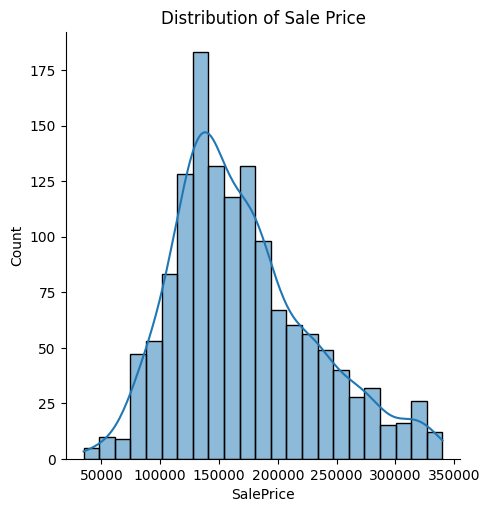

In [9]:
# View the distribution of the data
sns.displot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')

## View the statistical data of the continuous data

In [10]:
# Remove the integer columns that are not continuous
statistical_data = df.drop(['Id', 'MoSold', 'YrSold'], axis=1)  # No inplace=True

# View the statistics of the data
statistical_data.describe().round(2)


MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count     1399.00      1399.00    1399.00      1399.00      1399.00   
mean        57.49        69.05   10155.28         5.98         5.59   
std         42.80        21.52    8324.83         1.28         1.12   
min         20.00        21.00    1300.00         1.00         1.00   
25%         20.00        60.00    7442.00         5.00         5.00   
50%         50.00        69.00    9317.00         6.00         5.00   
75%         70.00        78.00   11316.50         7.00         6.00   
max        190.00       313.00  164660.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
count    1399.00       1399.00     1399.00     1399.00     1399.00  ...   
mean     1970.08       1984.06       89.73      417.33       47.48  ...   
std        30.01         20.66      159.22      428.40      162.65  ...   
min      1872.00       1950.00        0.00        0.00        0.00  ...   
25%      1953.00       1966.00        0.00        0.00        0.00  ...   
50%      1971.00       1992.00        0.00      370.00        0.00  ...   
75%      1999.00       2003.00      143.00      686.00        0.00  ...   
max      2009.00       2010.00     1600.00     5644.00     1474.00  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count     1399.00      1399.00        1399.00    1399.00      1399.00   
mean        89.62        44.89          22.38       3.23        14.63   
std        121.80        65.72          61.45      28.56        54.75   
min          0.00         0.00           0.00       0.00         0.00   
25%          0.00         0.00           0.00       0.00         0.00   
50%          0.00        22.00           0.00       0.00         0.00   
75%        165.00        64.00           0.00       0.00         0.00   
max        736.00       547.00         552.00     508.00       480.00   

       PoolArea   MiscVal  SalePrice  InternalSF  PorchDeckSF  
count   1399.00   1399.00    1399.00      1399.0      1399.00  
mean       2.48     45.39  170237.13      2493.0       174.76  
std       38.29    506.75   59230.13       740.0       152.12  
min        0.00      0.00   34900.00       334.0         0.00  
25%        0.00      0.00  129000.00      1982.0        43.50  
50%        0.00      0.00  159500.00      2433.0       160.00  
75%        0.00      0.00  203500.00      2934.0       259.00  
max      738.00  15500.00  340000.00     11752.0      1027.00  

[8 rows x 37 columns]

In [11]:
# Create a dataframe for the continuous variables
continuous_data = df.select_dtypes(include='number')

# drop the Id column
continuous_data.drop('Id', axis=1, inplace=True)

# Display the first 5 rows of the continuous data
continuous_data.head()

# Export the continuous data to a csv file
continuous_data.to_csv('outputs/continuous_data.csv', index=False)


In [12]:
# Compute correlation
correlation_matrix = continuous_data.corr()

# Get correlation of all features with SalesPrice
correlation_with_salesprice = correlation_matrix['SalePrice'].drop('SalePrice')

# Sort correlations in descending order
correlation_ranked = correlation_with_salesprice.abs().sort_values(ascending=False)

# Convert to DataFrame for better presentation
correlation_df = correlation_ranked.to_frame().reset_index()
correlation_df.columns = ['Feature', 'Correlation with SalePrice']

# Display the results
correlation_df.head(50)

Feature  Correlation with SalePrice
0     OverallQual                    0.784294
1      InternalSF                    0.732131
2       GrLivArea                    0.661325
3      GarageCars                    0.628013
4      GarageArea                    0.607230
5        FullBath                    0.577369
6       YearBuilt                    0.564558
7     TotalBsmtSF                    0.543508
8    YearRemodAdd                    0.541161
9        1stFlrSF                    0.522785
10    GarageYrBlt                    0.475781
11   TotRmsAbvGrd                    0.472292
12     Fireplaces                    0.453010
13    PorchDeckSF                    0.371556
14     MasVnrArea                    0.350541
15    OpenPorchSF                    0.325791
16       2ndFlrSF                    0.317358
17     WoodDeckSF                    0.302339
18    LotFrontage                    0.295796
19     BsmtFinSF1                    0.290377
20       HalfBath                    0.278831
21        LotArea                    0.249812
22      BsmtUnfSF                    0.222795
23   BsmtFullBath                    0.202185
24   BedroomAbvGr                    0.201610
25   KitchenAbvGr                    0.147385
26  EnclosedPorch                    0.144996
27    ScreenPorch                    0.108851
28         MoSold                    0.070478
29     MSSubClass                    0.060111
30   LowQualFinSF                    0.058086
31       PoolArea                    0.048682
32    OverallCond                    0.048005
33      3SsnPorch                    0.043324
34         YrSold                    0.028245
35   BsmtHalfBath                    0.018827
36        MiscVal                    0.012872
37     BsmtFinSF2                    0.007154

In [13]:
print(correlation_matrix)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.361707 -0.149714     0.066951    -0.070420   
LotFrontage     -0.361707     1.000000  0.310615     0.183611    -0.038090   
LotArea         -0.149714     0.310615  1.000000     0.070548     0.004398   
OverallQual      0.066951     0.183611  0.070548     1.000000    -0.071040   
OverallCond     -0.070420    -0.038090  0.004398    -0.071040     1.000000   
YearBuilt        0.045599     0.090081  0.001485     0.561141    -0.361703   
YearRemodAdd     0.055086     0.058428  0.012715     0.532226     0.093423   
MasVnrArea       0.046949     0.135240  0.090614     0.324097    -0.115830   
BsmtFinSF1      -0.050465     0.194962  0.203555     0.151949    -0.019725   
BsmtFinSF2      -0.066088     0.039418  0.057139    -0.050548     0.039380   
BsmtUnfSF       -0.137873     0.108742  0.014446     0.309623    -0.139107   
TotalBsmtSF     -0.224965     0.335661  0.252314     0.466350   

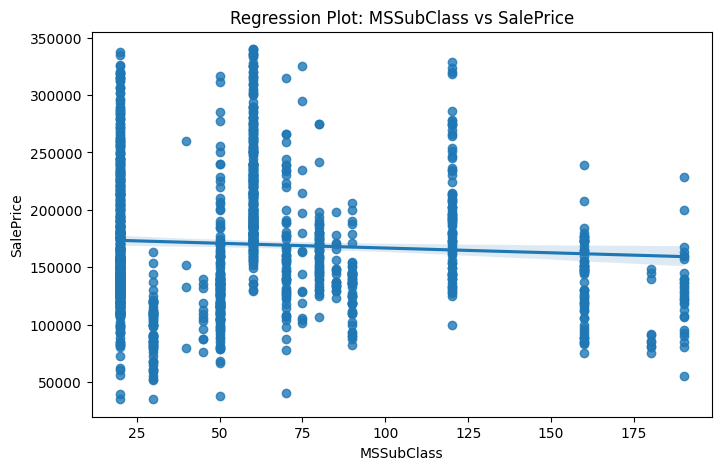

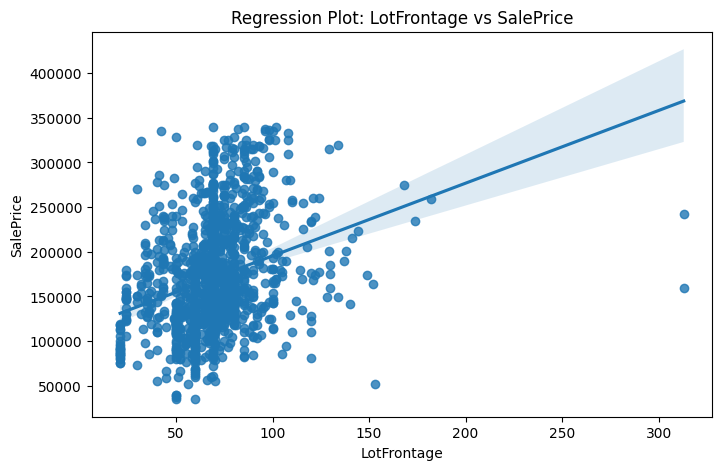

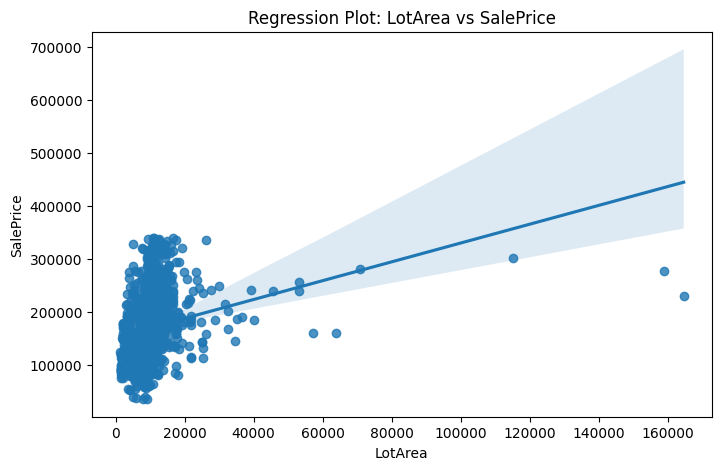

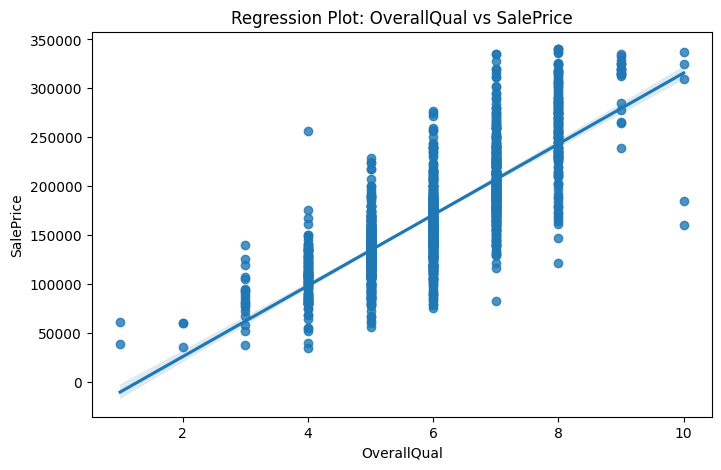

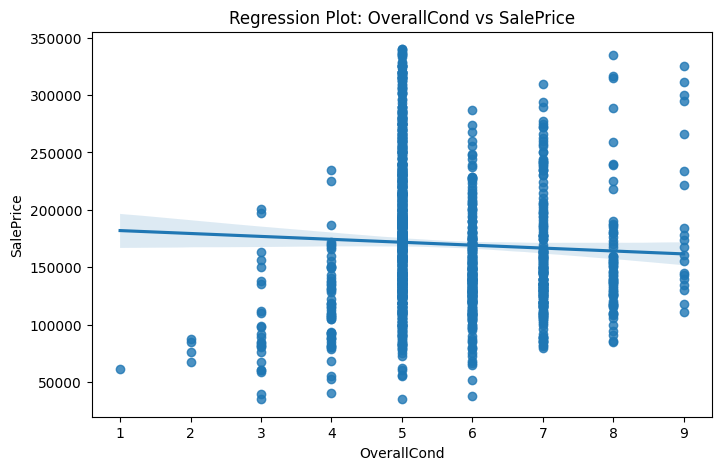

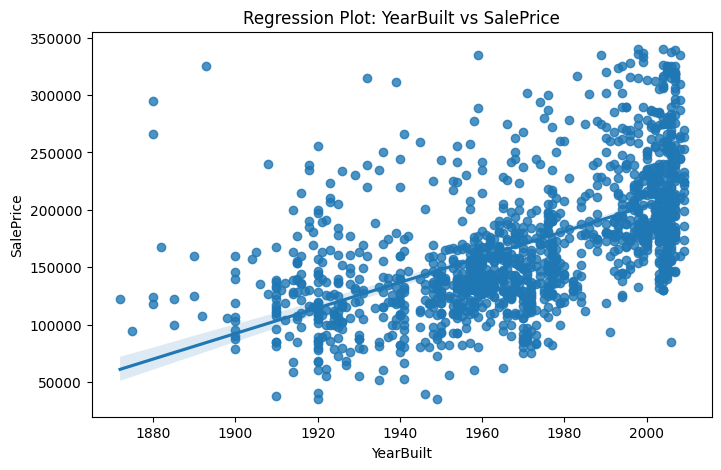

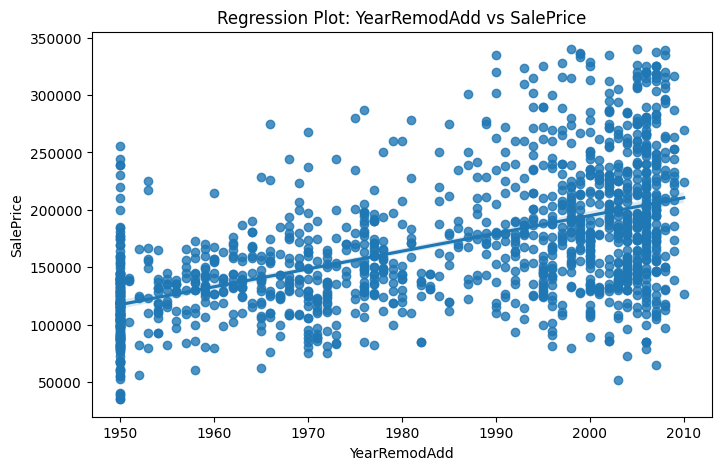

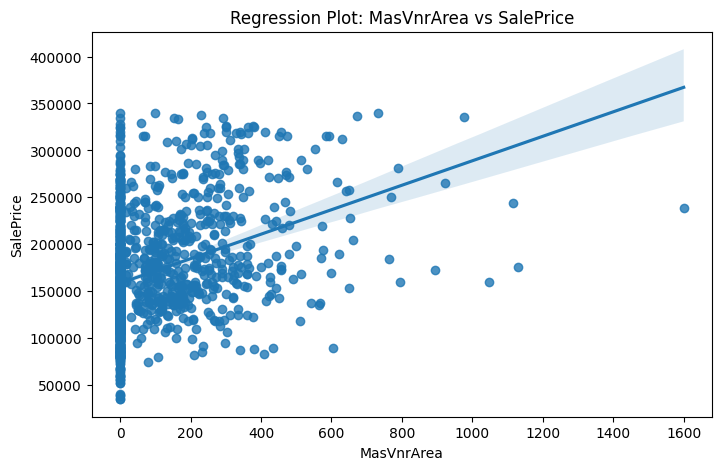

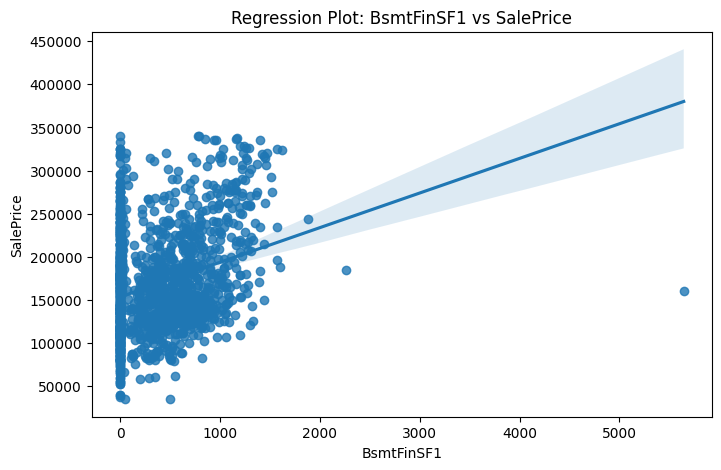

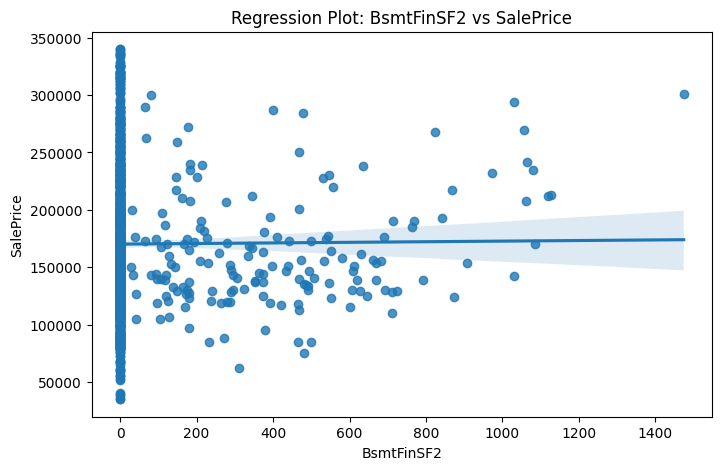

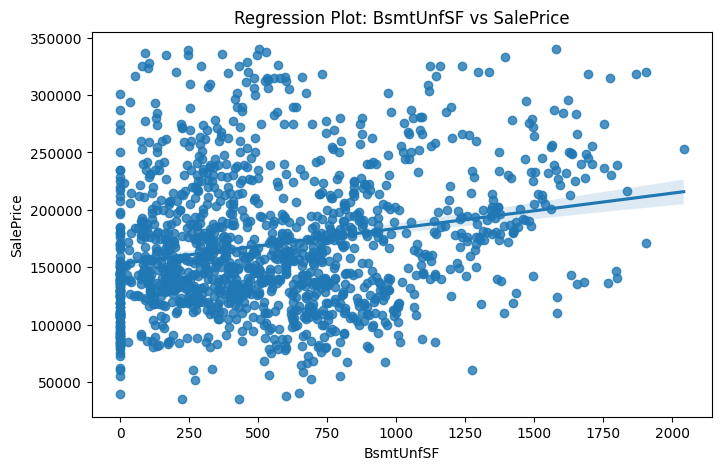

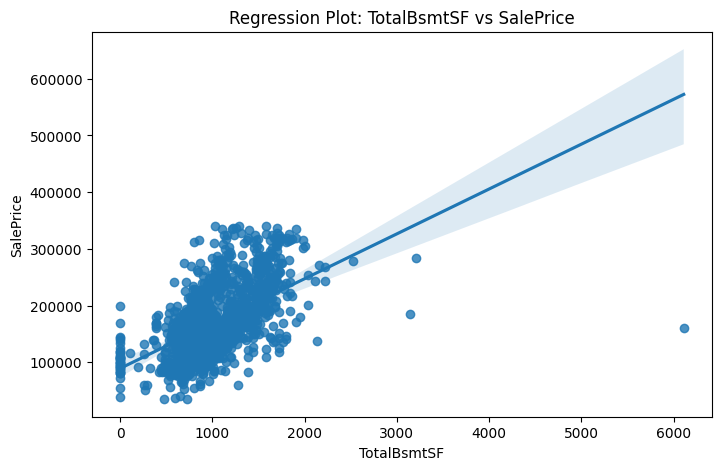

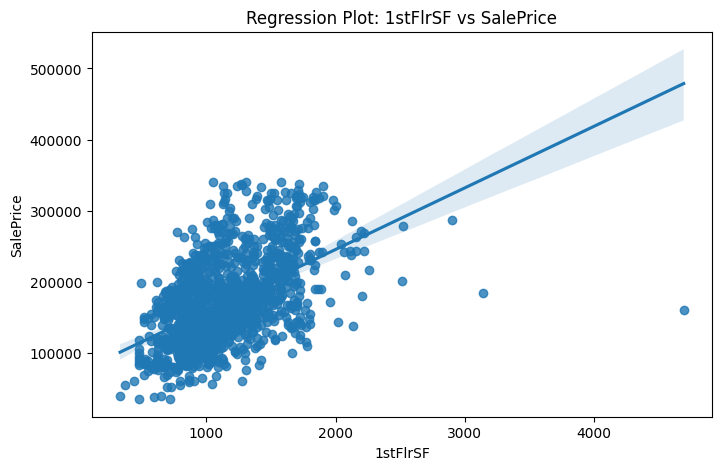

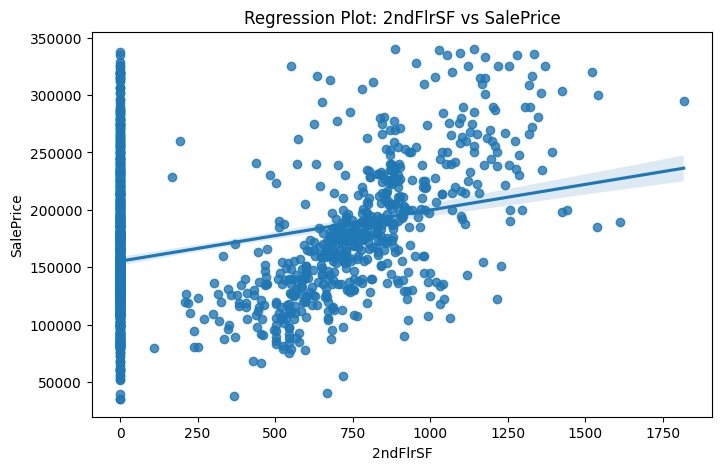

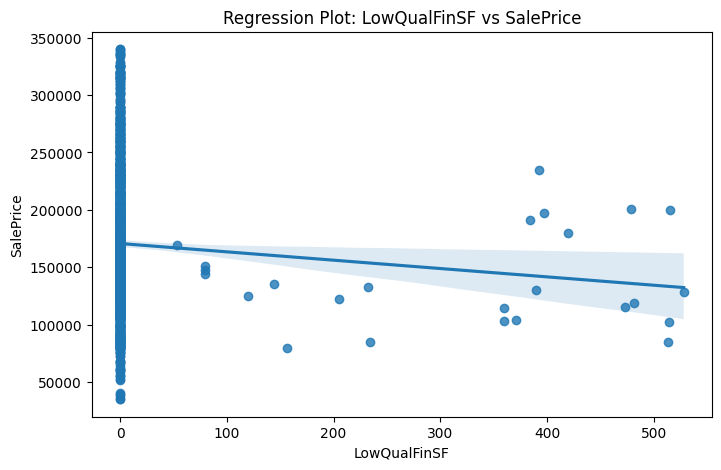

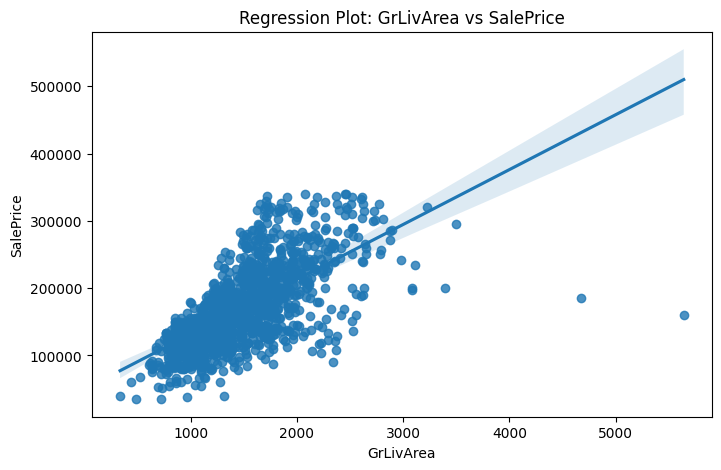

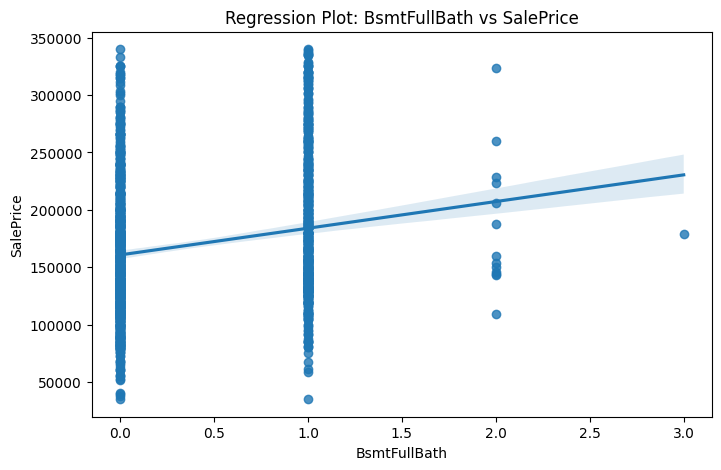

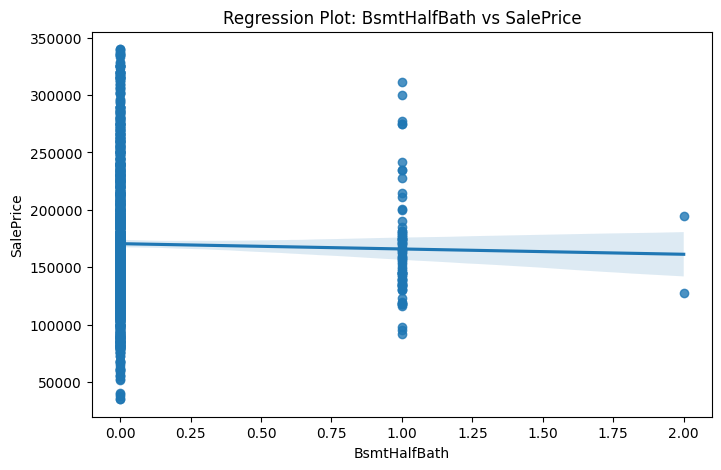

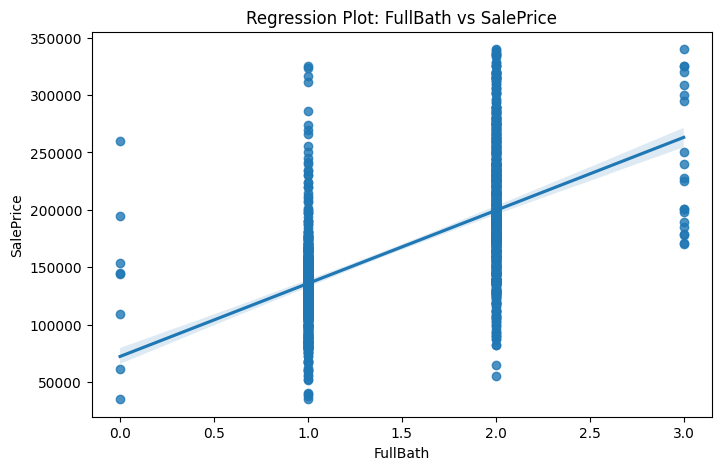

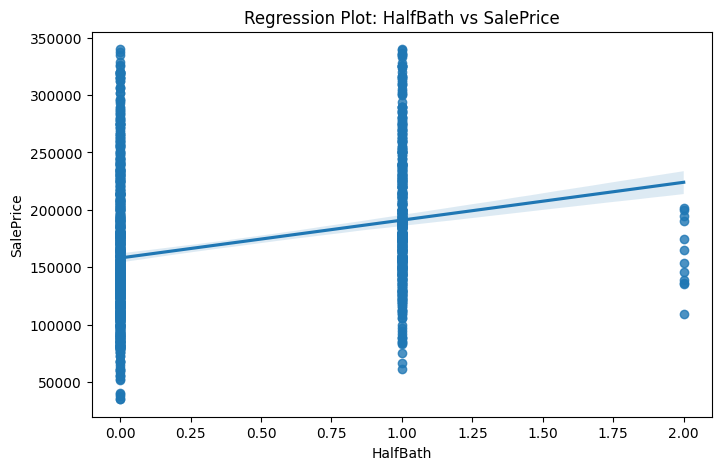

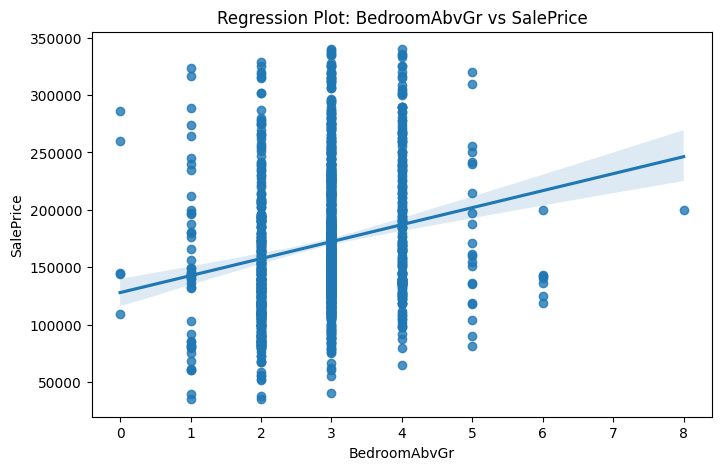

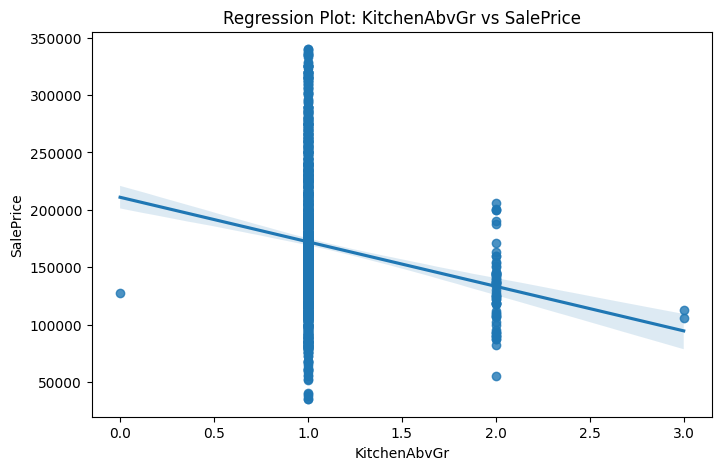

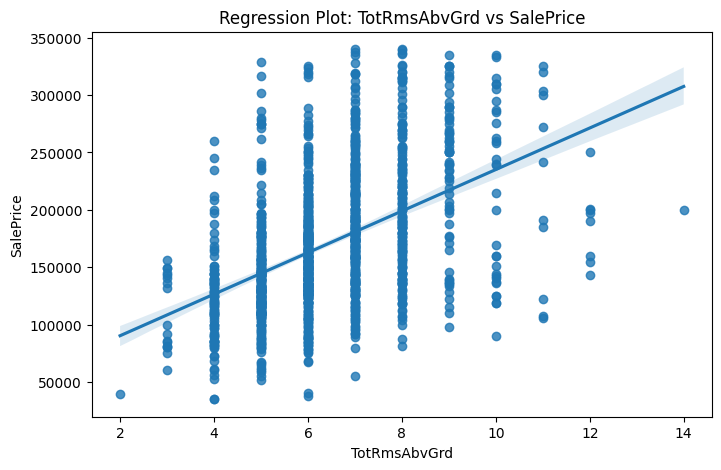

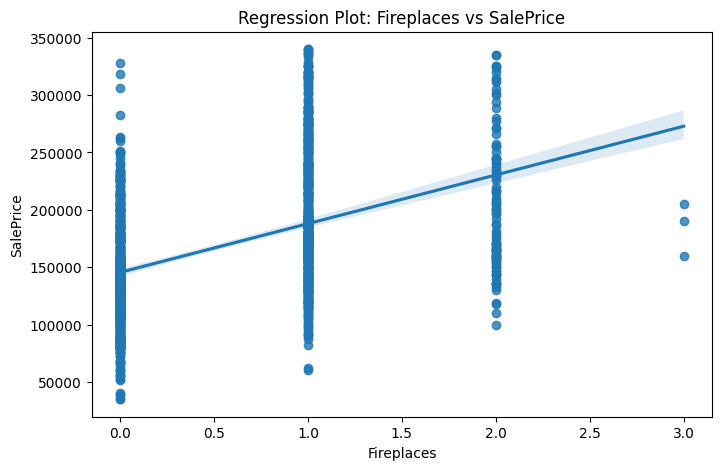

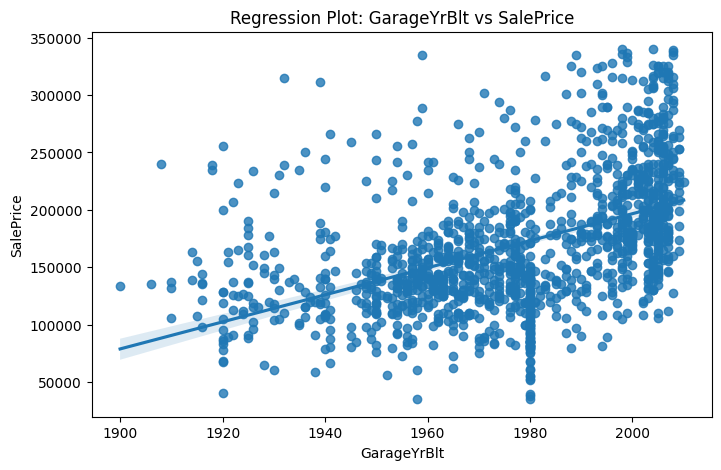

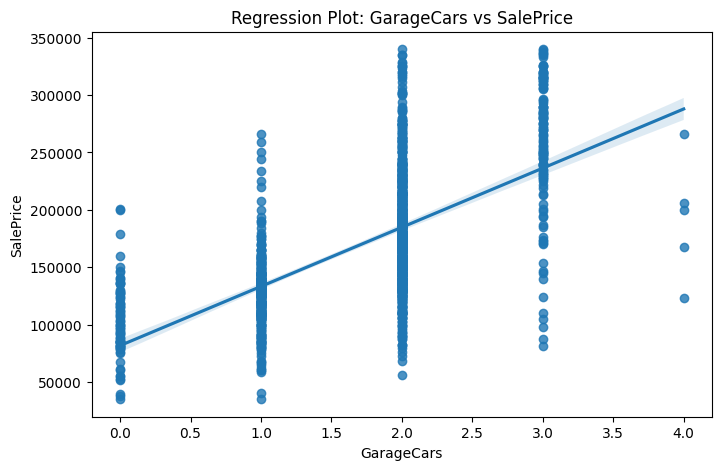

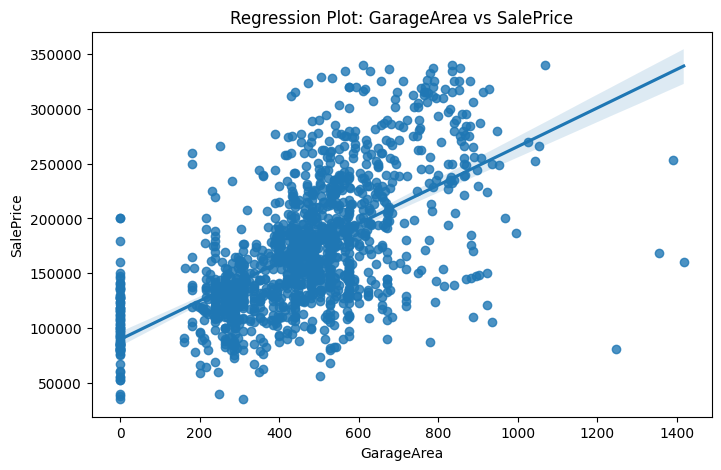

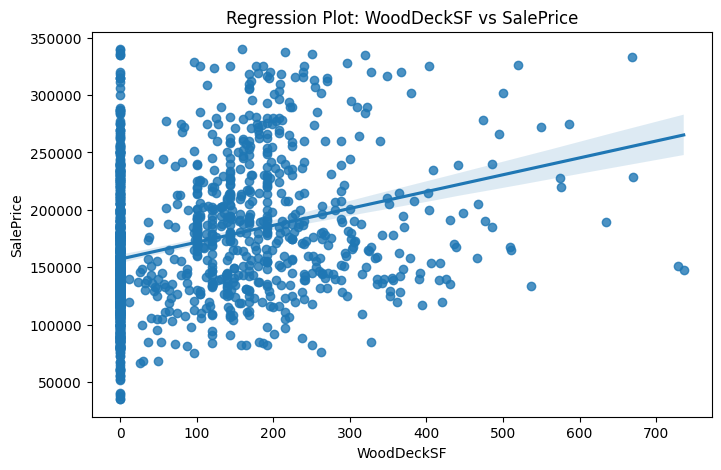

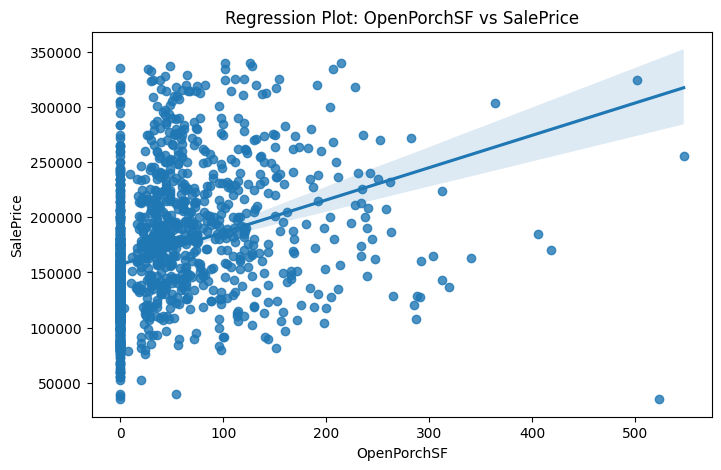

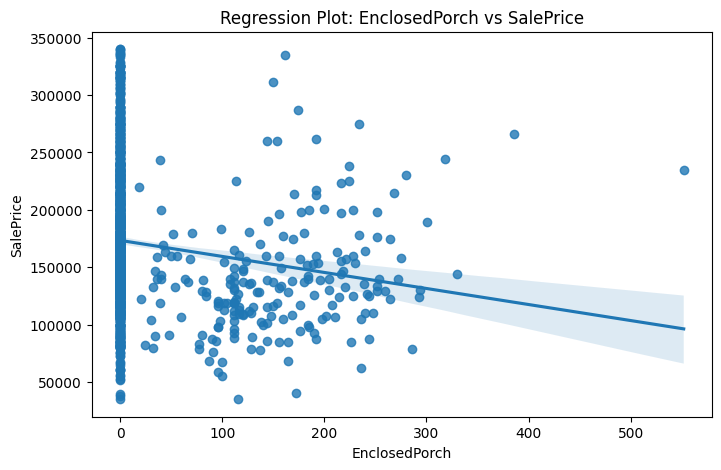

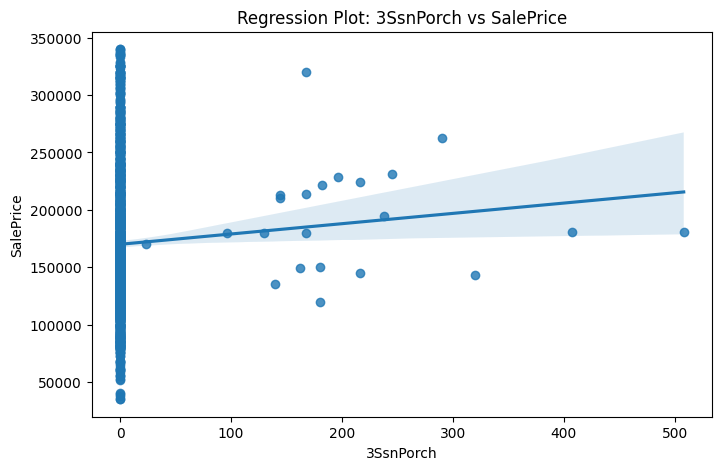

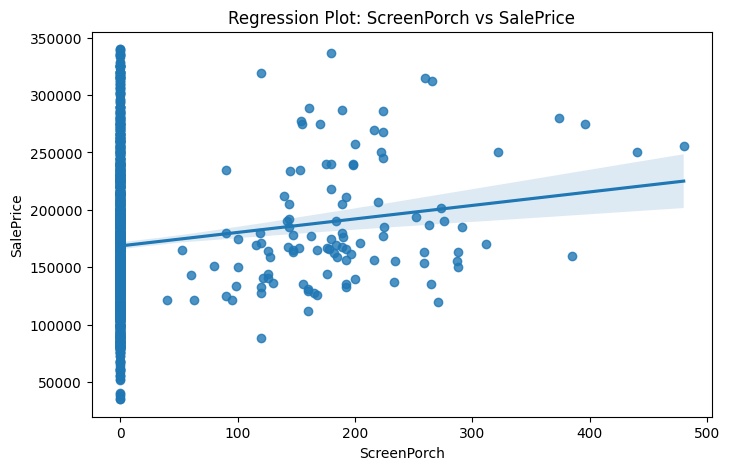

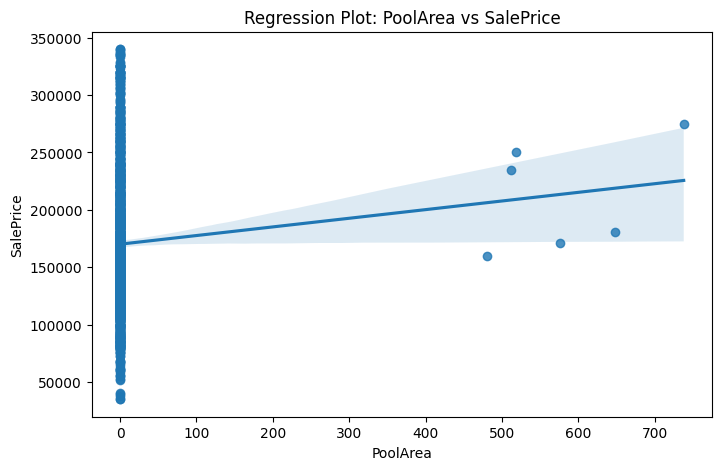

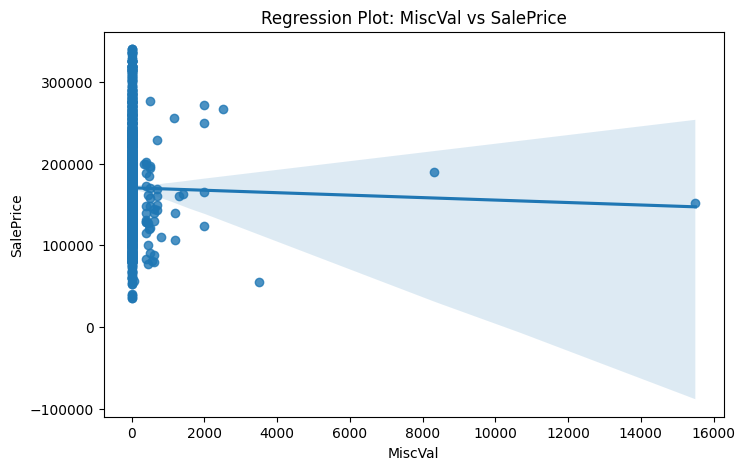

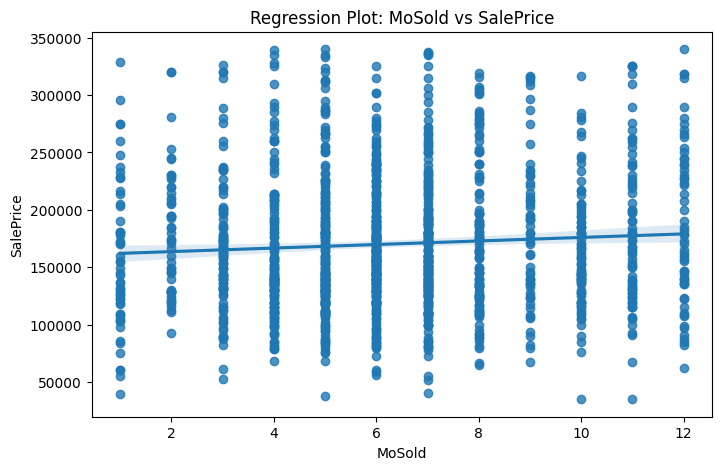

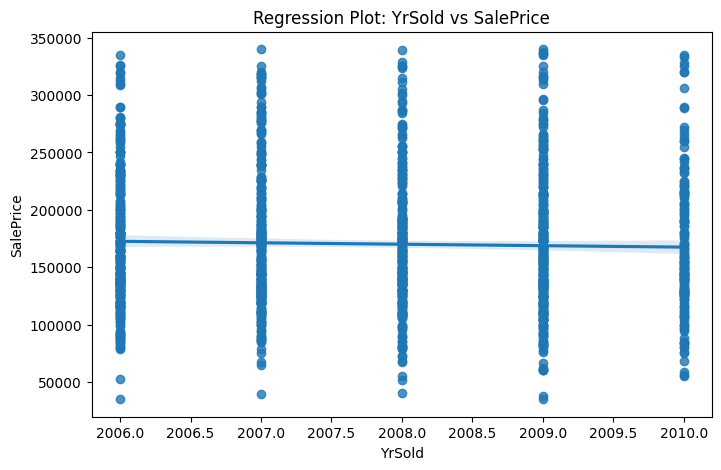

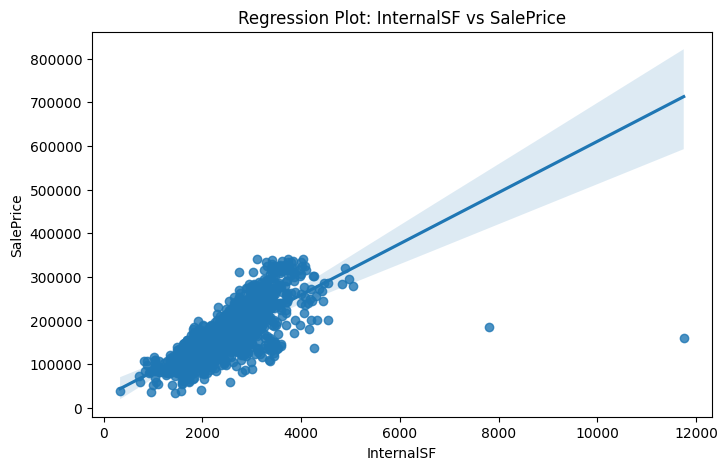

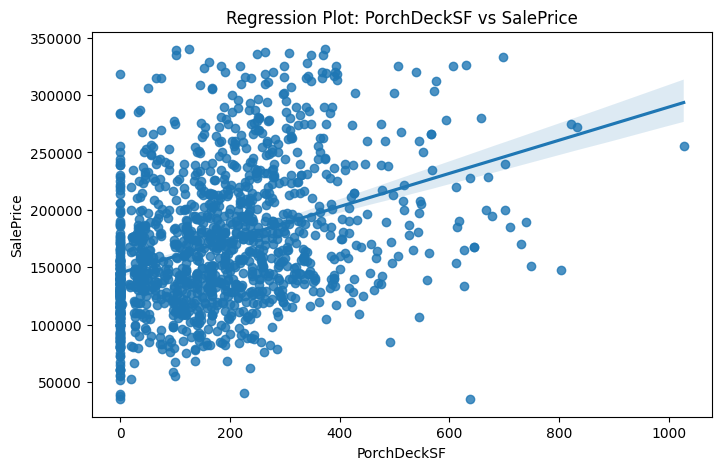

In [14]:
# Create regression plots for all numeric columns except 'SalePrice'
for col in continuous_data.columns:
    if col != 'SalePrice':  # Avoid plotting SalePrice against itself
        plt.figure(figsize=(8, 5))
        sns.regplot(x=continuous_data[col], y=continuous_data['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.title(f'Regression Plot: {col} vs SalePrice')
        plt.show()

## Categorical data

In [15]:
# Select object (categorical) columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Add 'SalesPrice' to the selected columns
categorical_columns.append('SalePrice')

# Create categorical_data DataFrame
categorical_data = df[categorical_columns]

# Display the first 5 rows of the categorical data
categorical_data.head()

MSZoning Street           Alley LotShape LandContour Utilities LotConfig  \
0       RL   Pave  Not Applicable      Reg         Lvl    AllPub    Inside   
1       RL   Pave  Not Applicable      Reg         Lvl    AllPub       FR2   
2       RL   Pave  Not Applicable      IR1         Lvl    AllPub    Inside   
3       RL   Pave  Not Applicable      IR1         Lvl    AllPub    Corner   
4       RL   Pave  Not Applicable      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1  ... GarageQual GarageCond PavedDrive  \
0       Gtl      CollgCr       Norm  ...         TA         TA          Y   
1       Gtl      Veenker      Feedr  ...         TA         TA          Y   
2       Gtl      CollgCr       Norm  ...         TA         TA          Y   
3       Gtl      Crawfor       Norm  ...         TA         TA          Y   
4       Gtl      NoRidge       Norm  ...         TA         TA          Y   

           PoolQC           Fence     MiscFeature SaleType SaleCondition  \
0  Not Applicable  Not Applicable  Not Applicable       WD        Normal   
1  Not Applicable  Not Applicable  Not Applicable       WD        Normal   
2  Not Applicable  Not Applicable  Not Applicable       WD        Normal   
3  Not Applicable  Not Applicable  Not Applicable       WD       Abnorml   
4  Not Applicable  Not Applicable  Not Applicable       WD        Normal   

  Neighborhood_Price_Bucket SalePrice  
0                   Level_3    208500  
1                   Level_4    181500  
2                   Level_3    223500  
3                   Level_4    140000  
4                   Level_4    250000  

[5 rows x 45 columns]

### Distribution

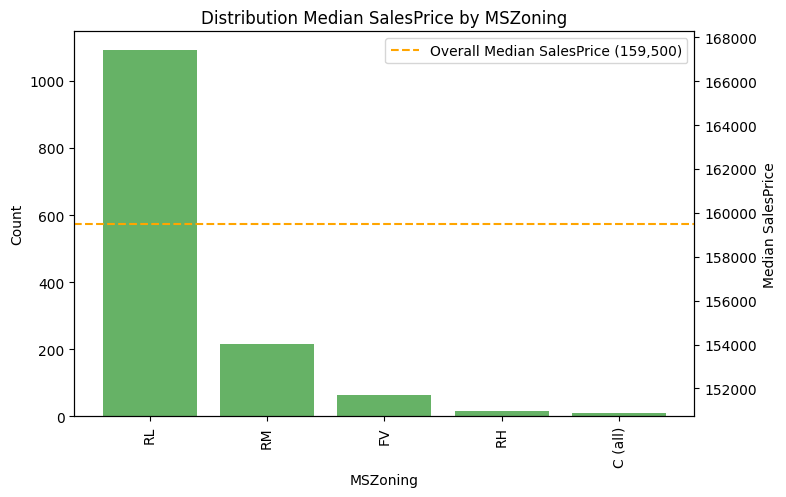

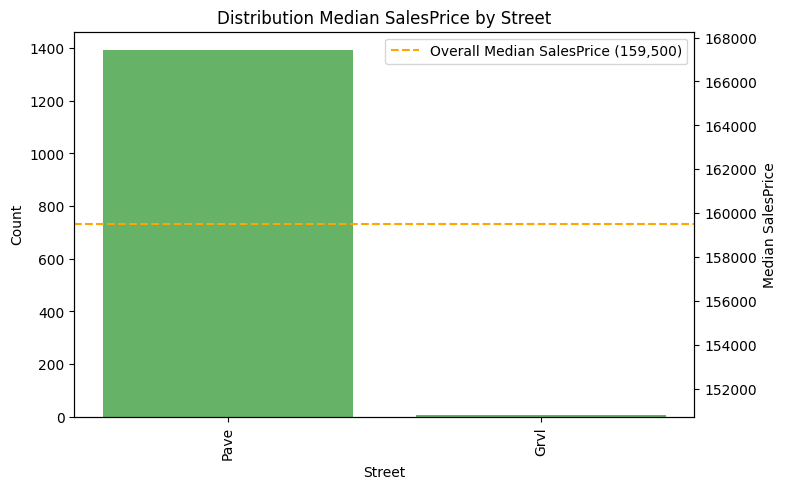

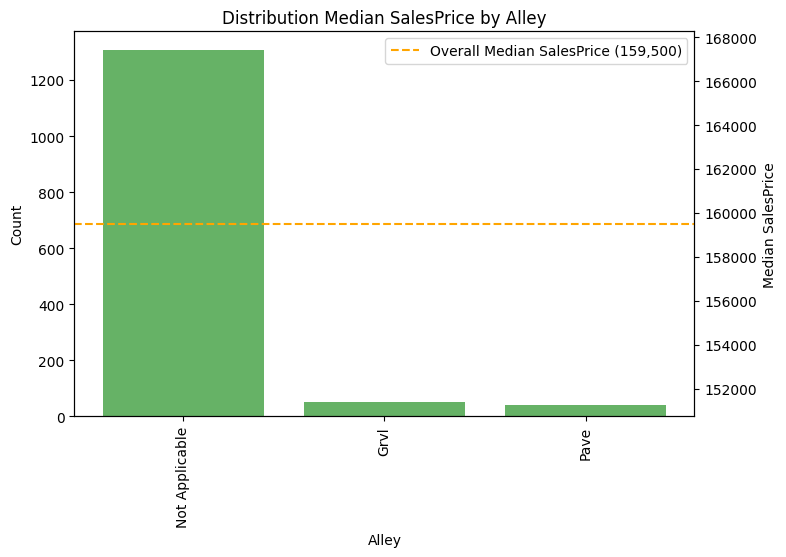

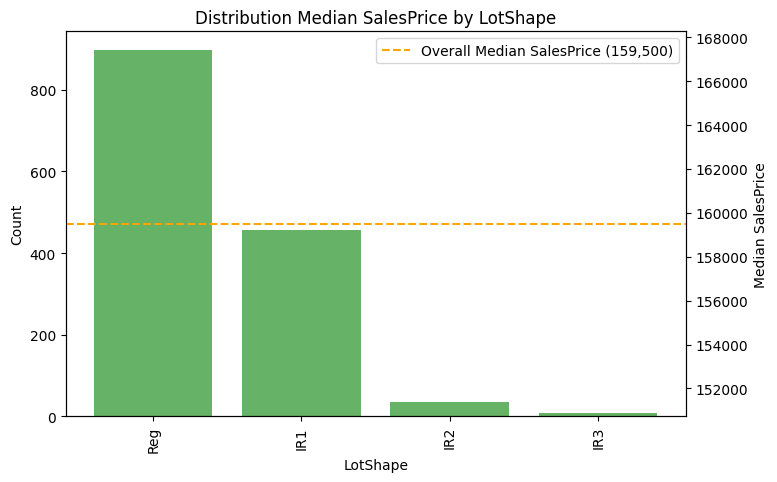

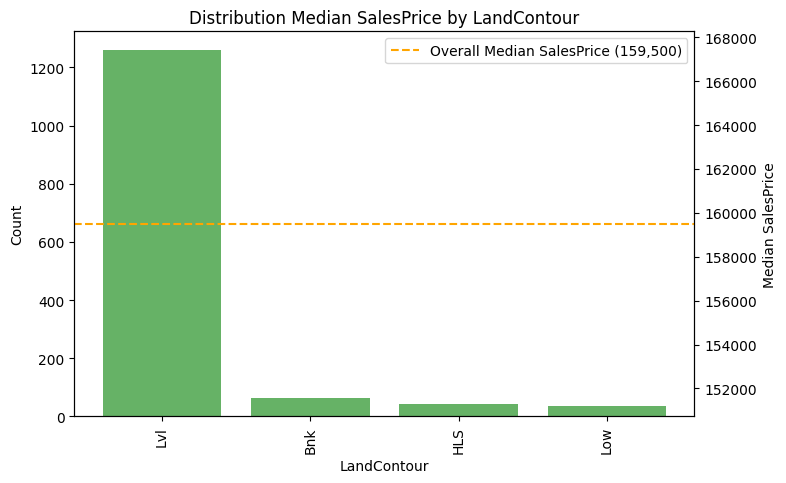

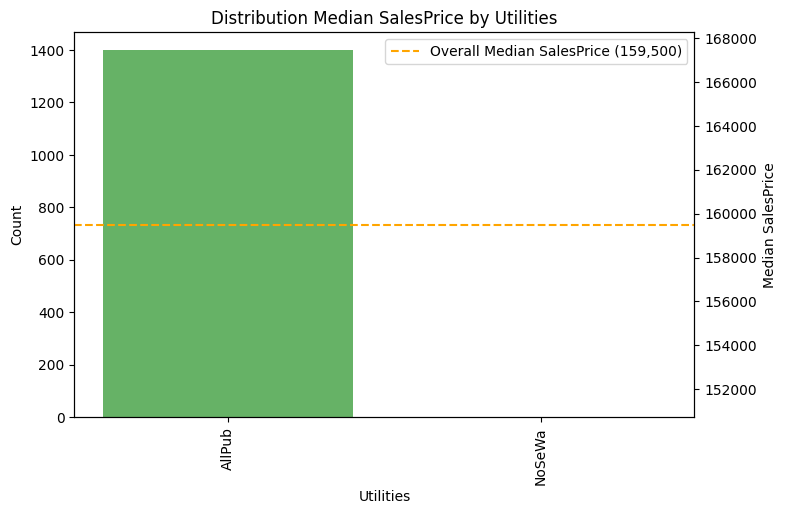

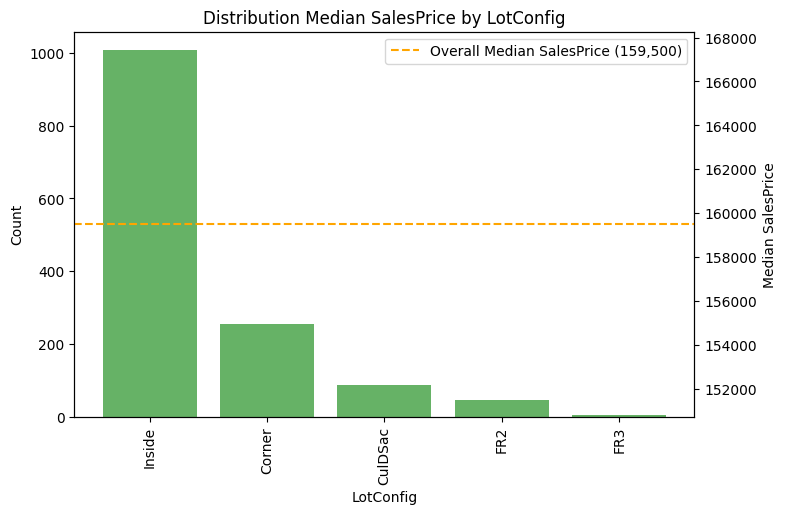

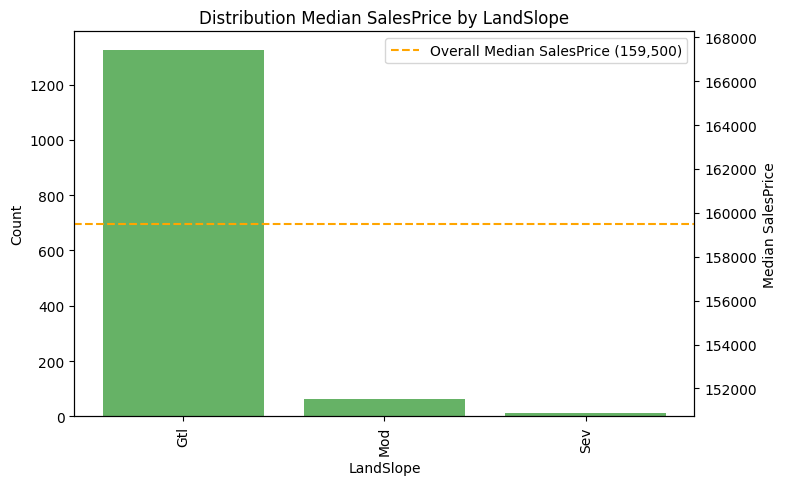

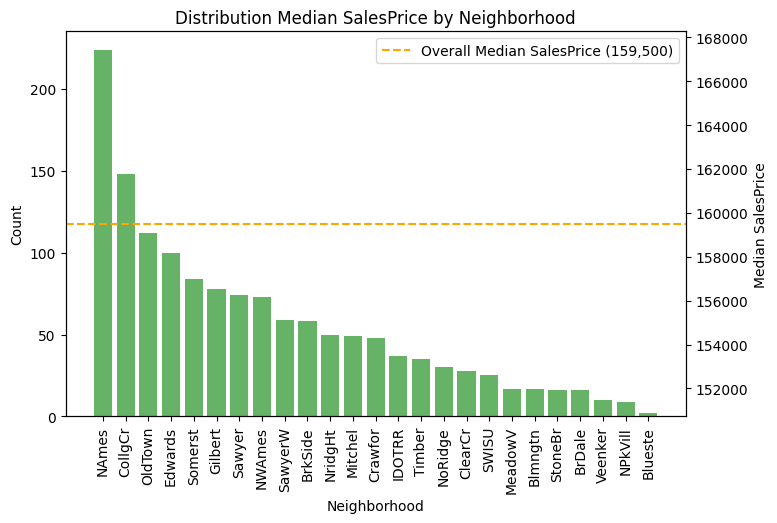

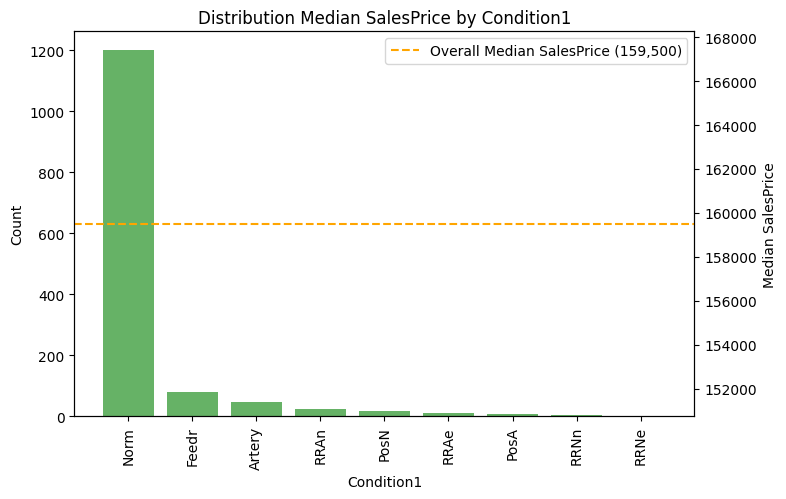

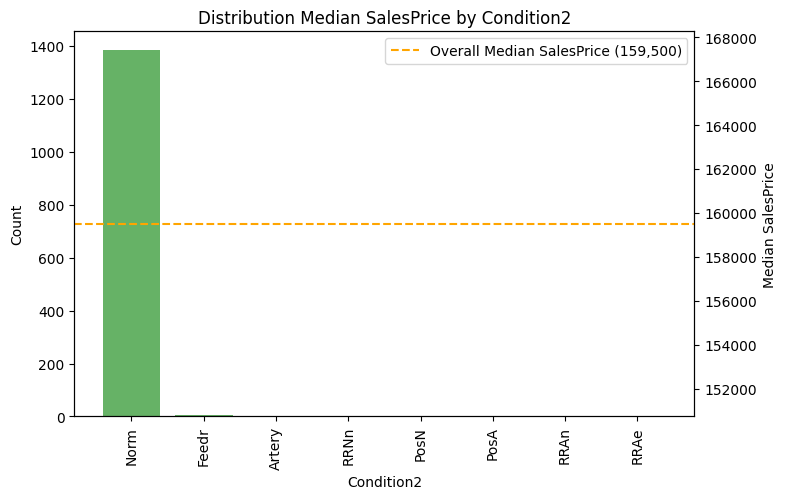

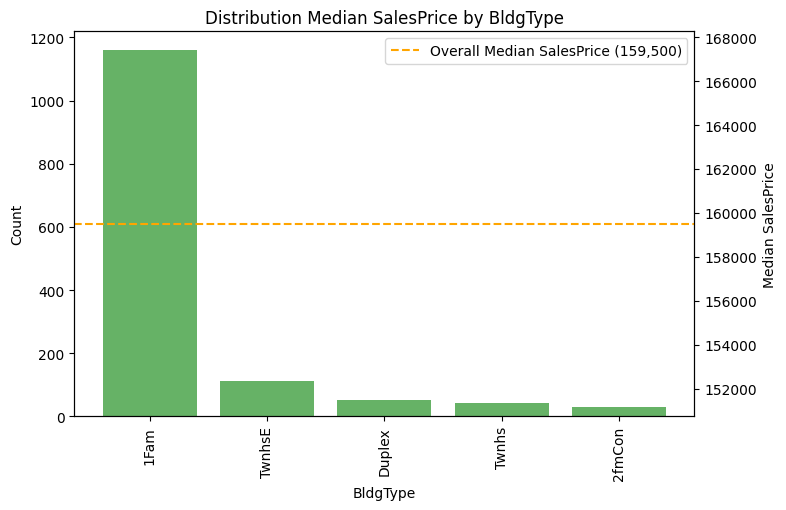

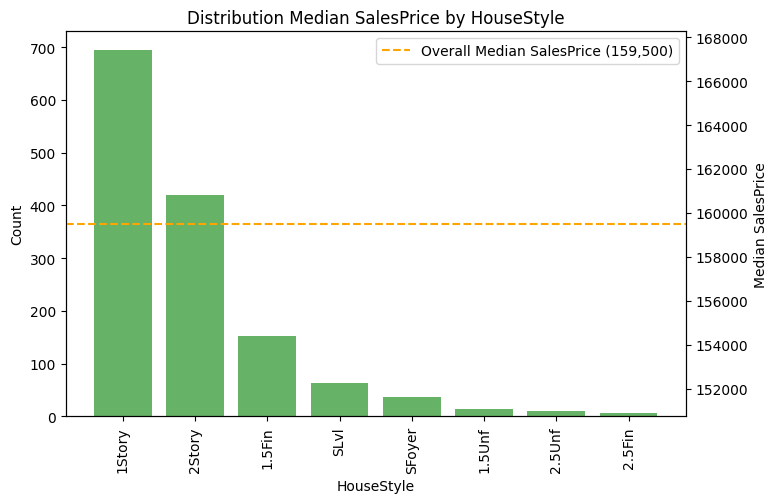

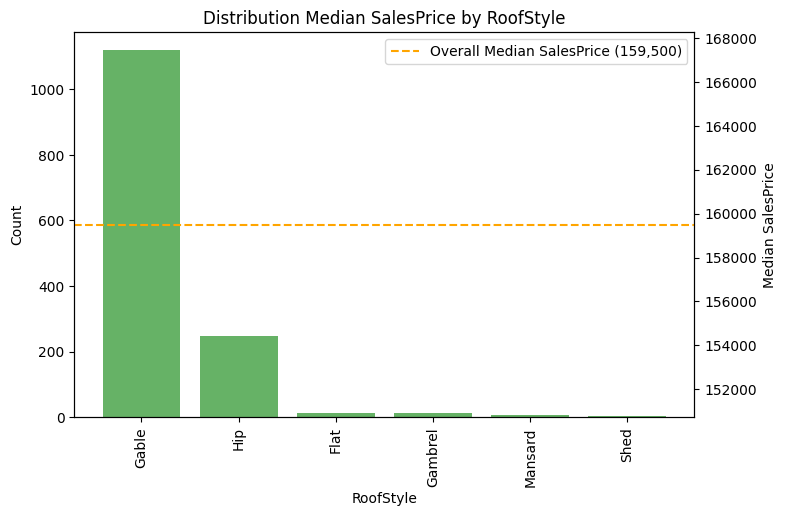

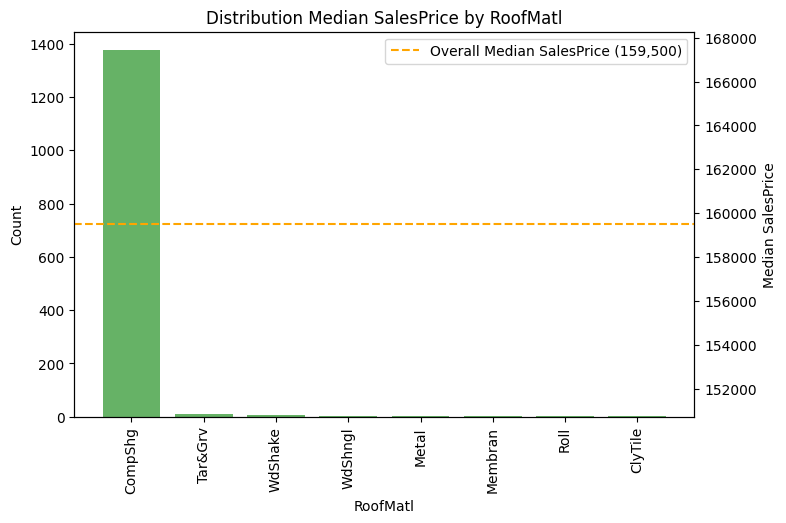

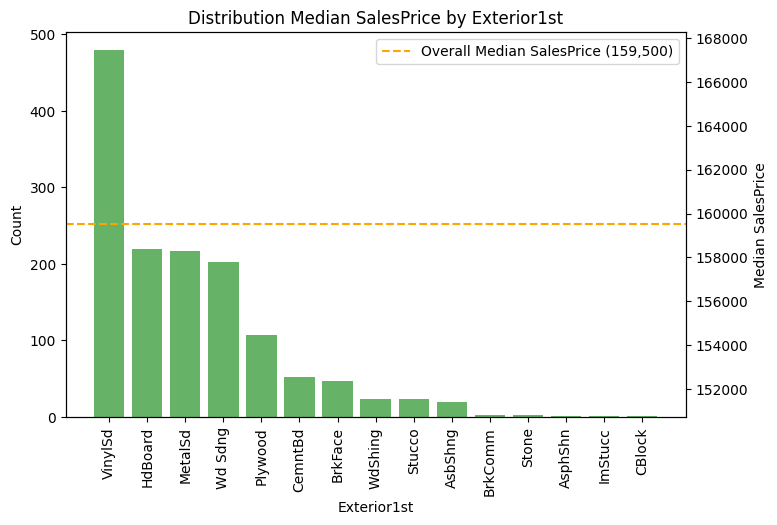

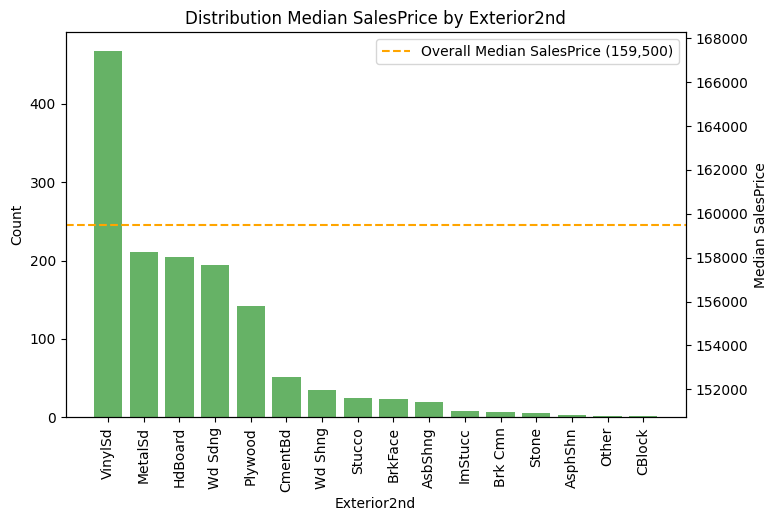

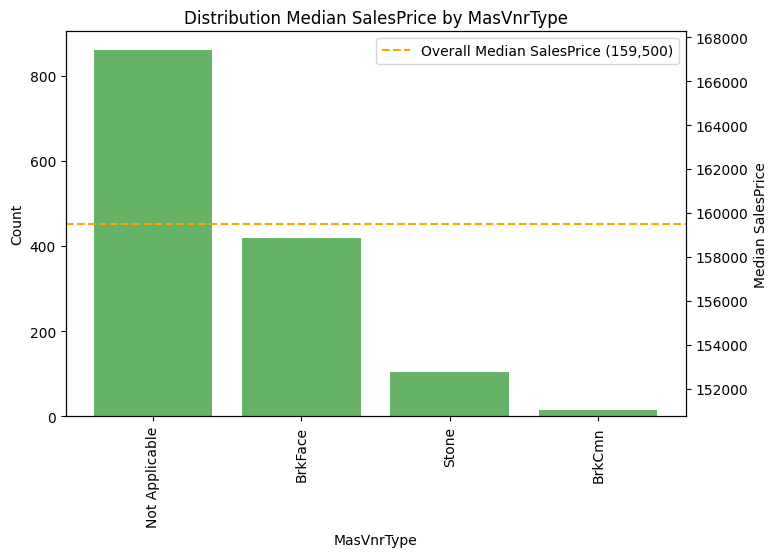

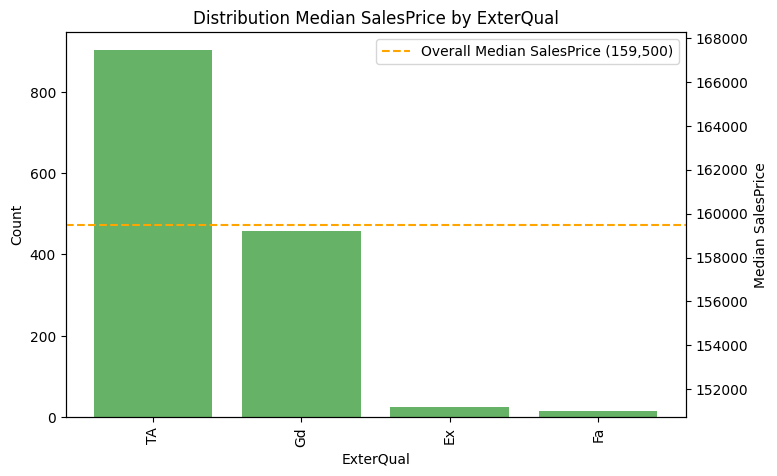

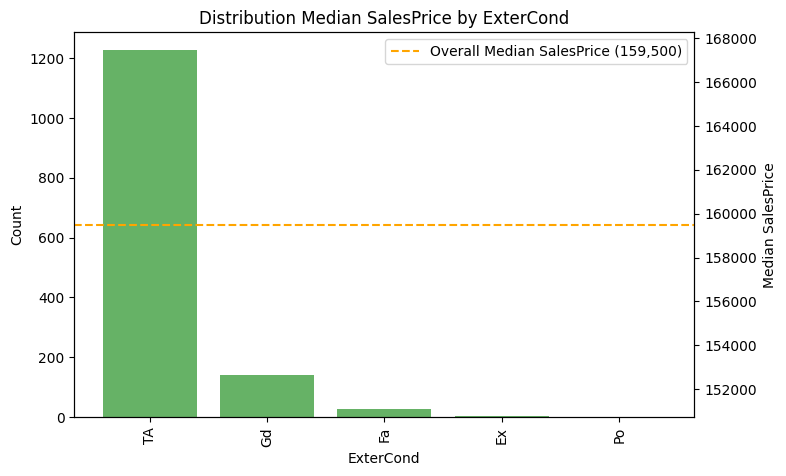

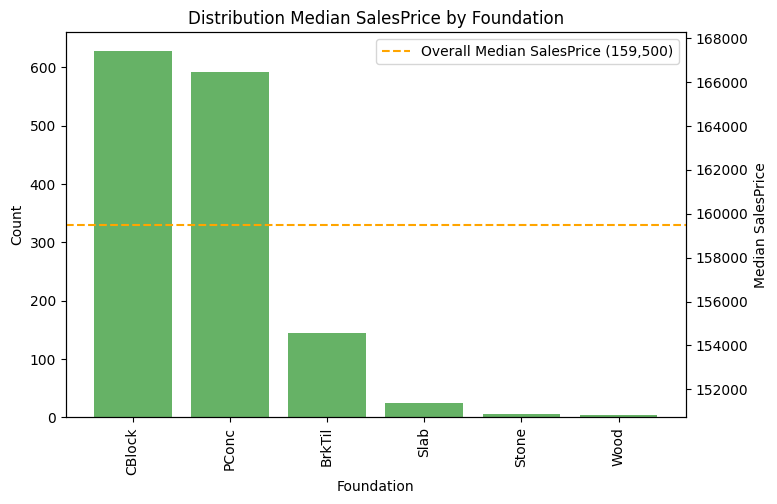

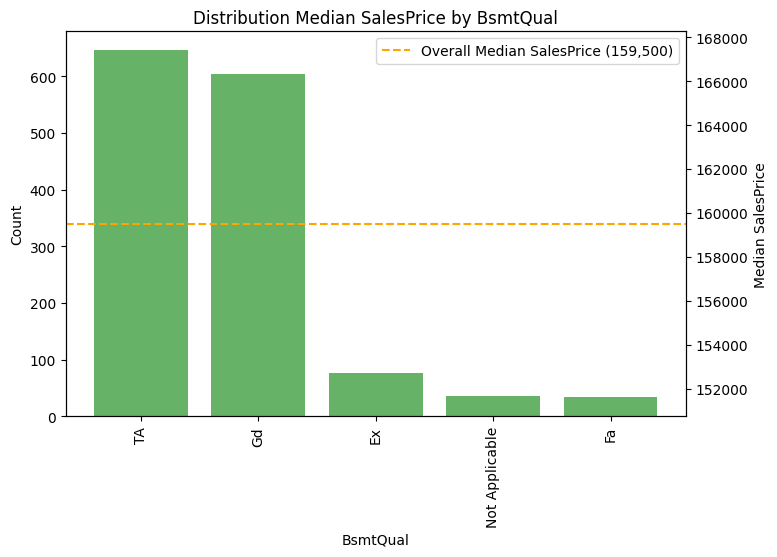

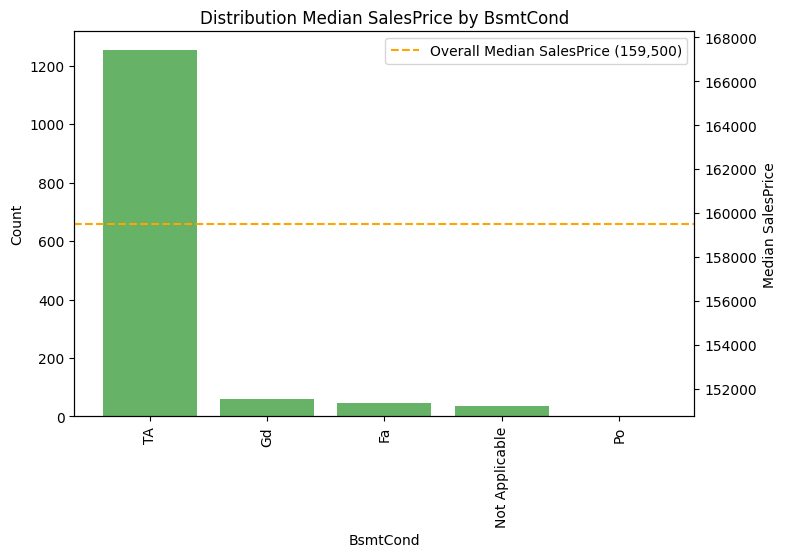

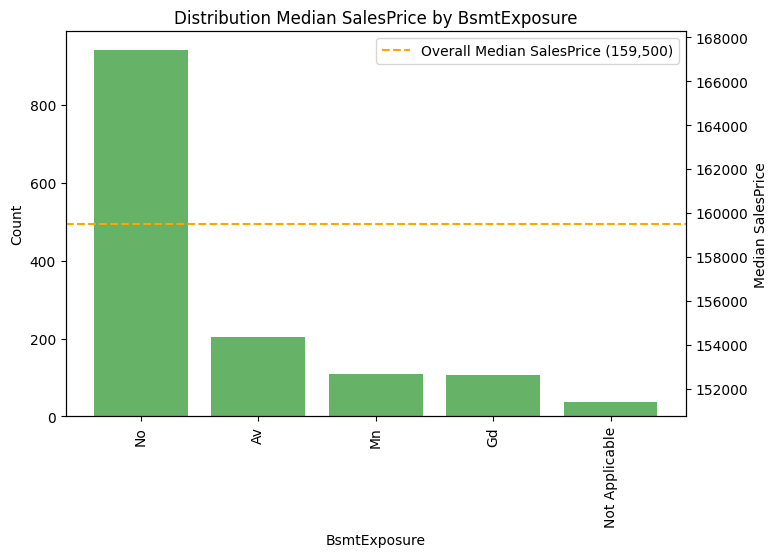

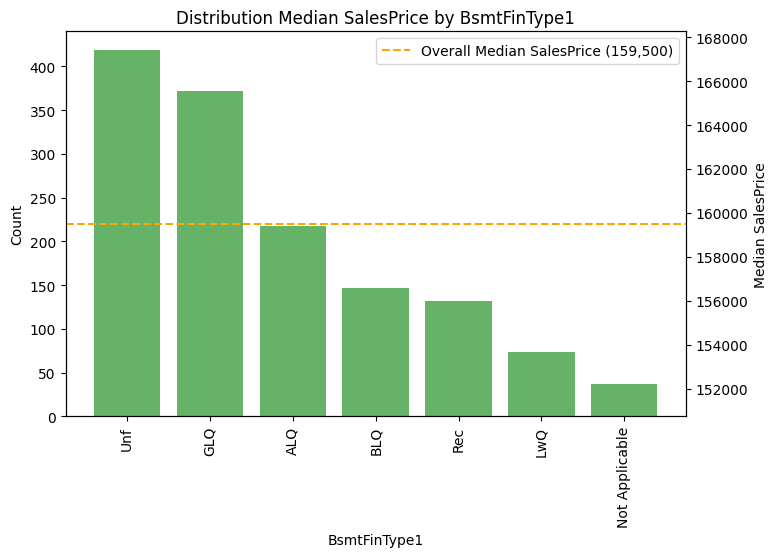

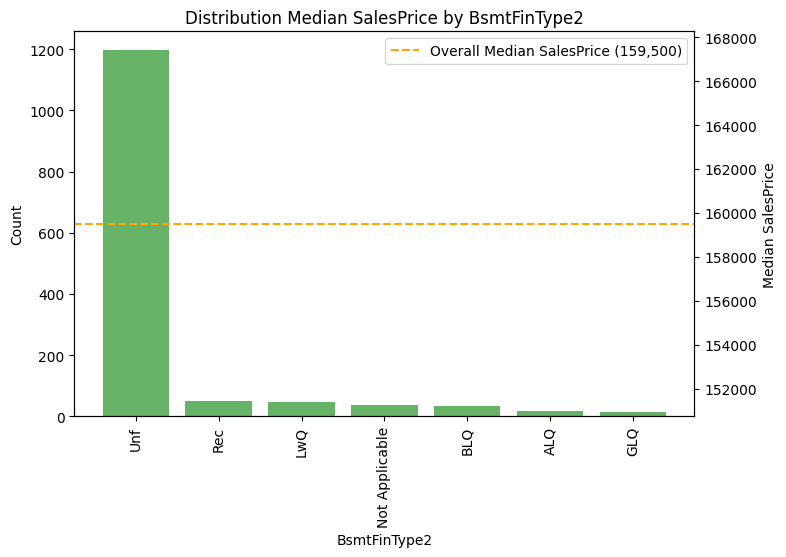

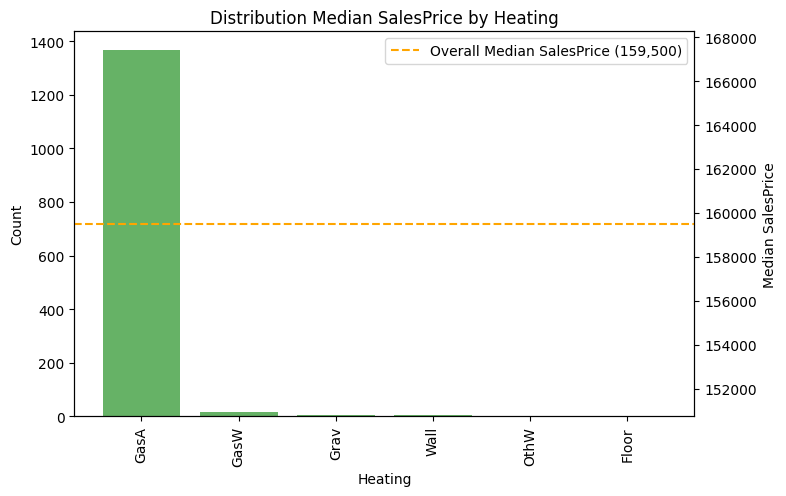

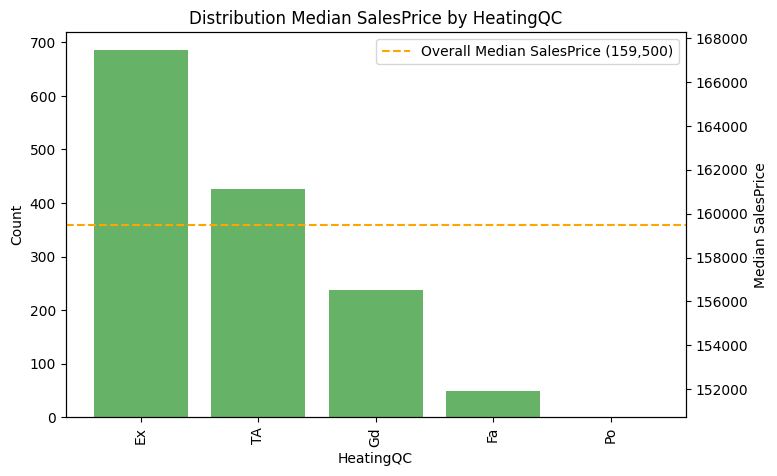

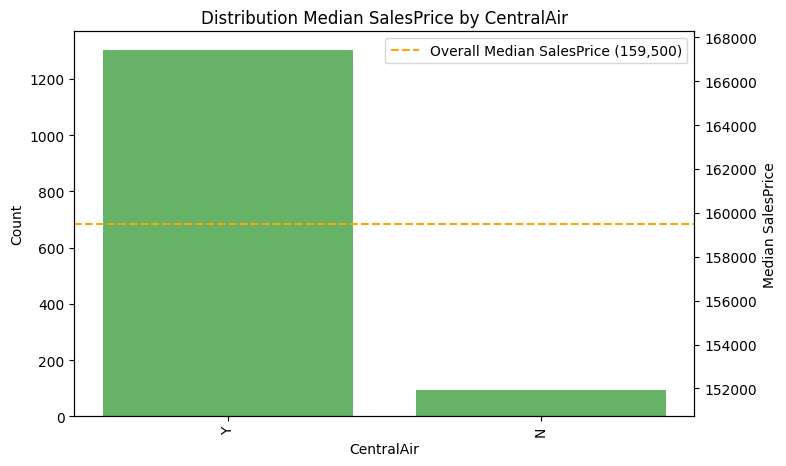

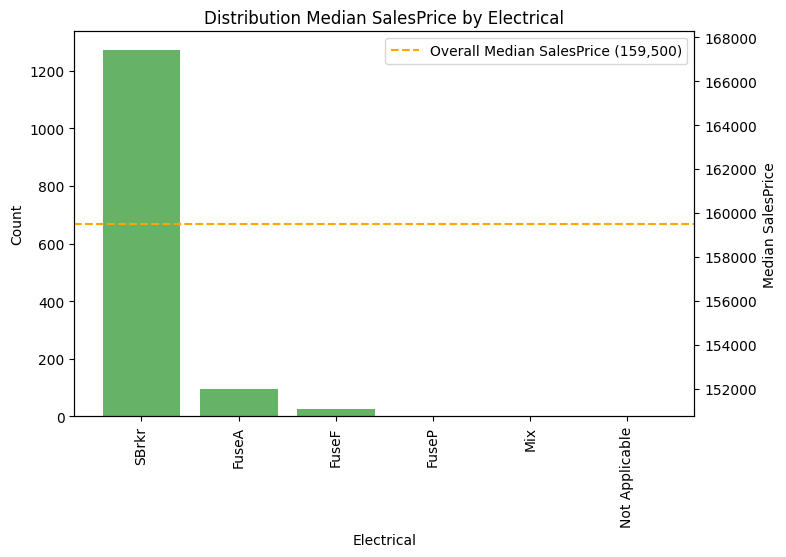

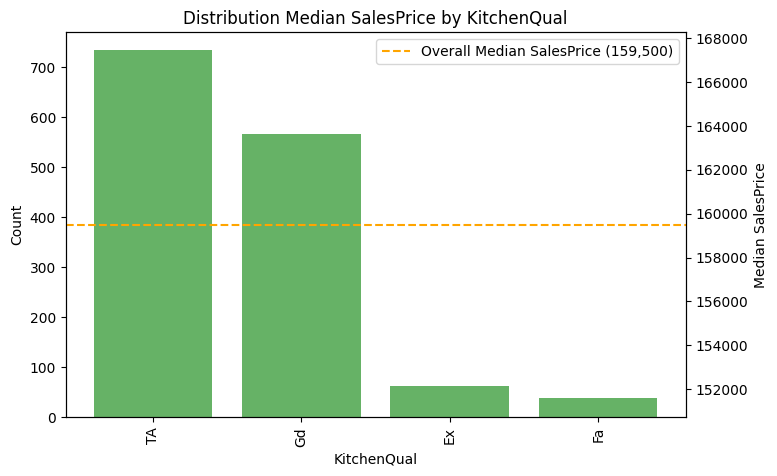

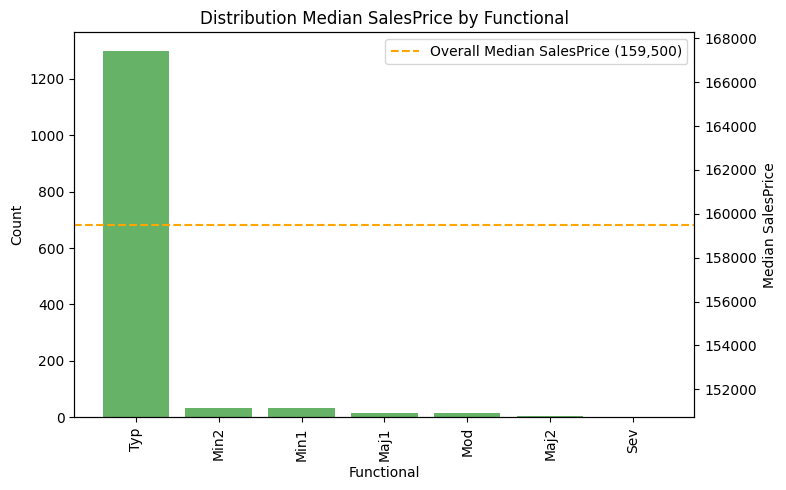

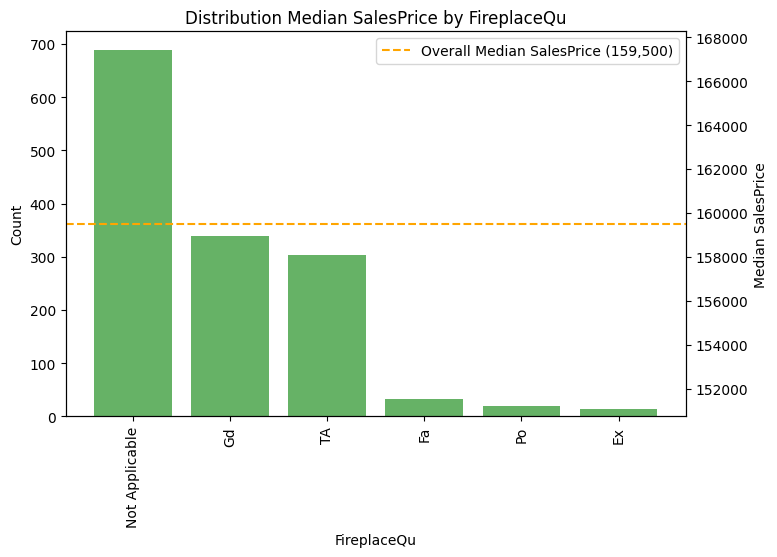

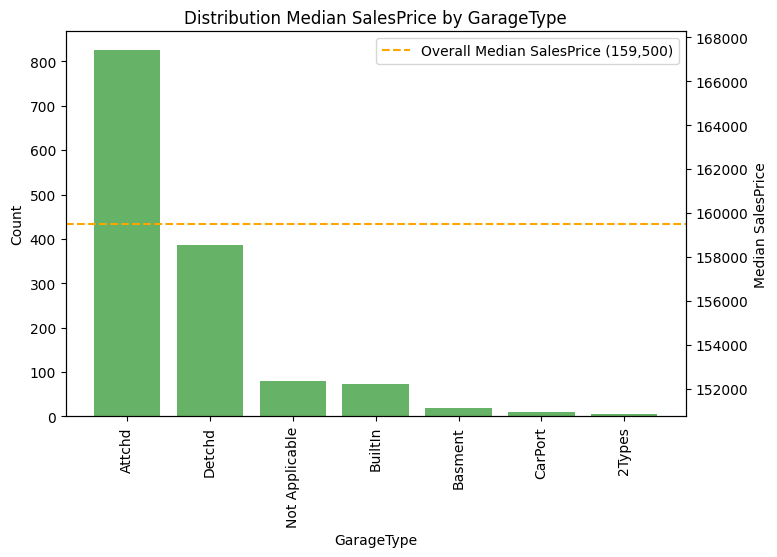

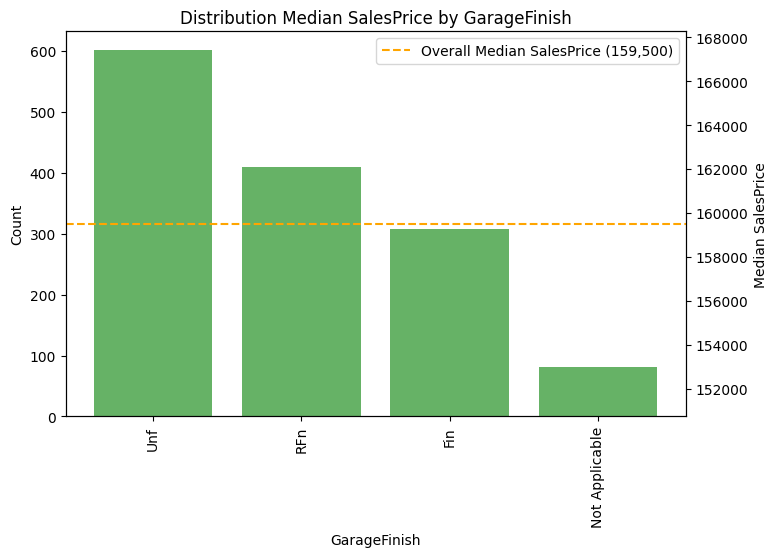

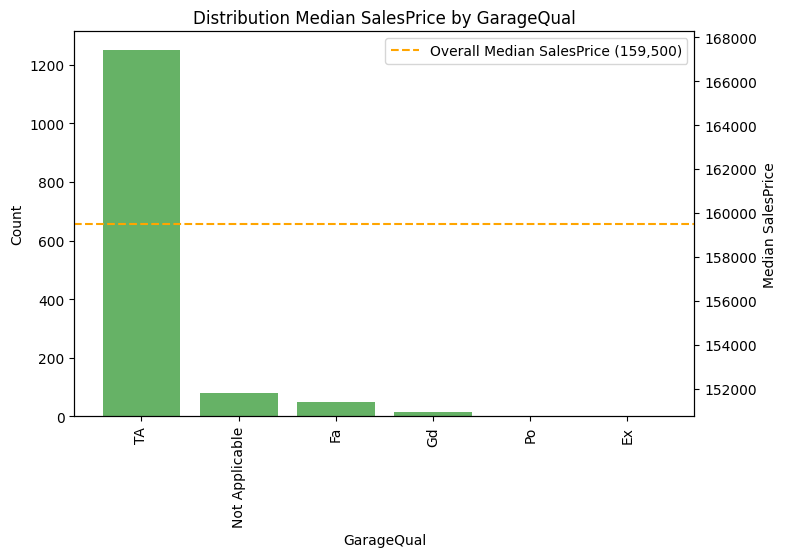

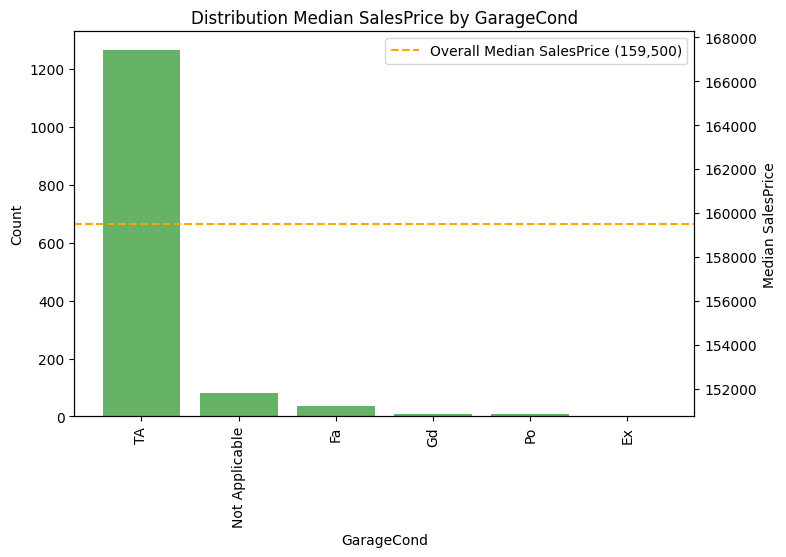

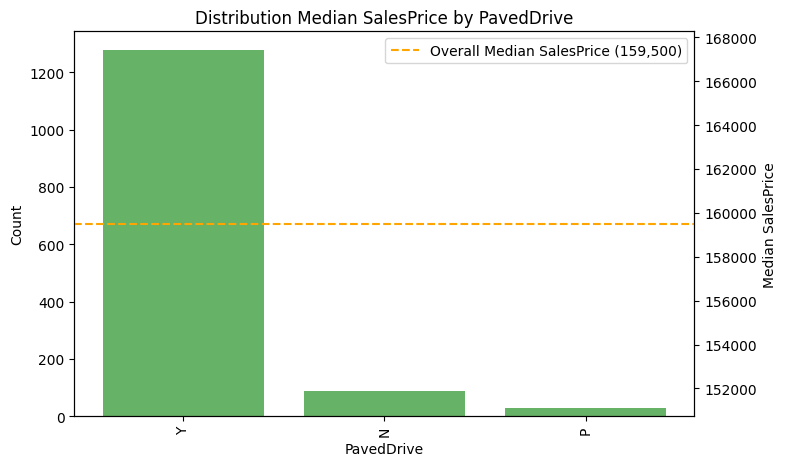

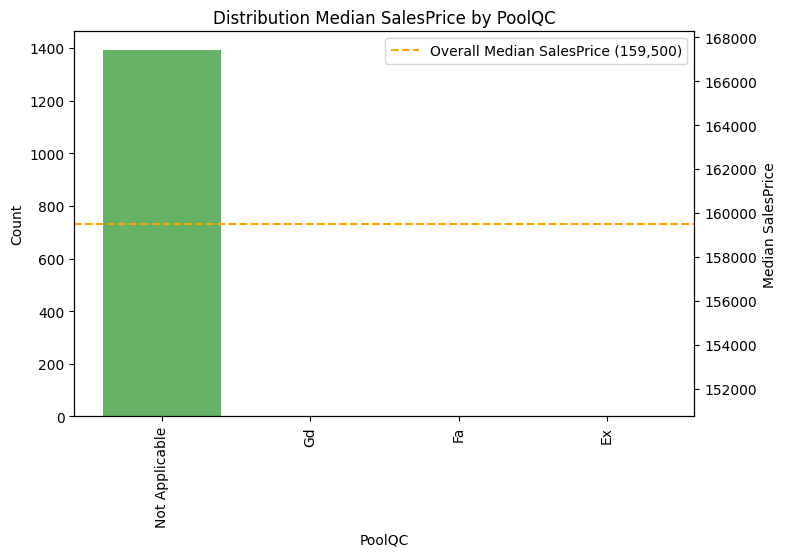

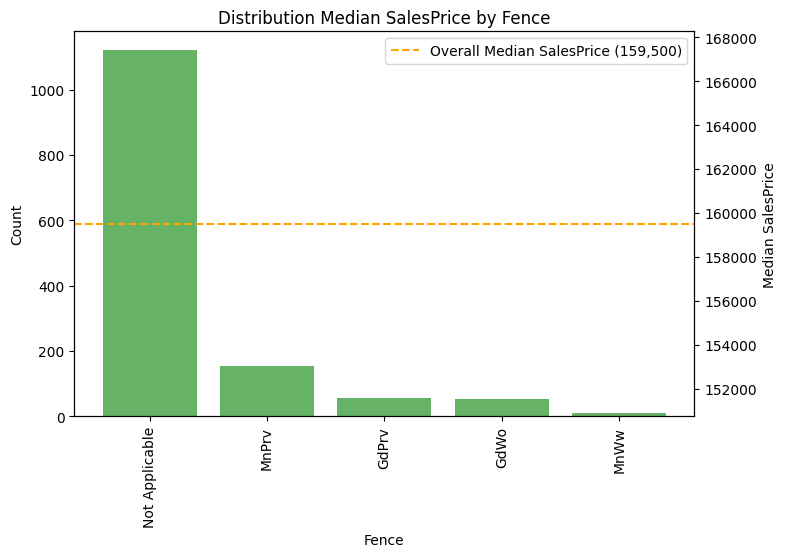

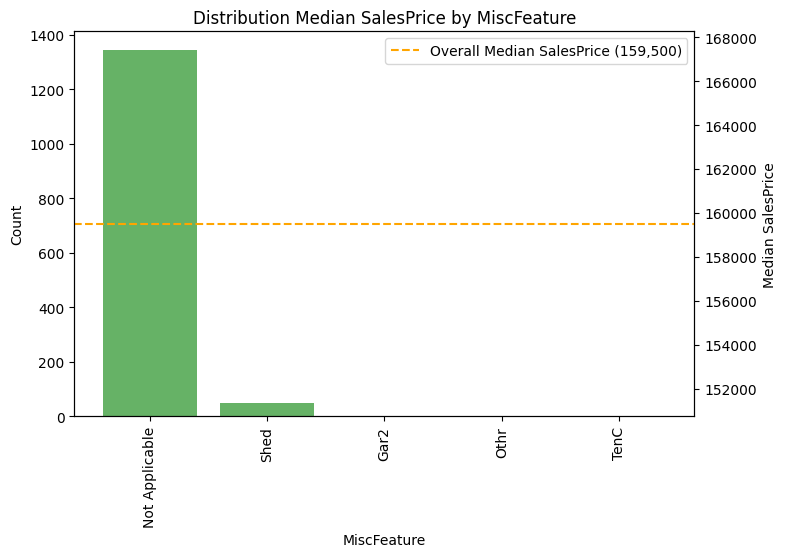

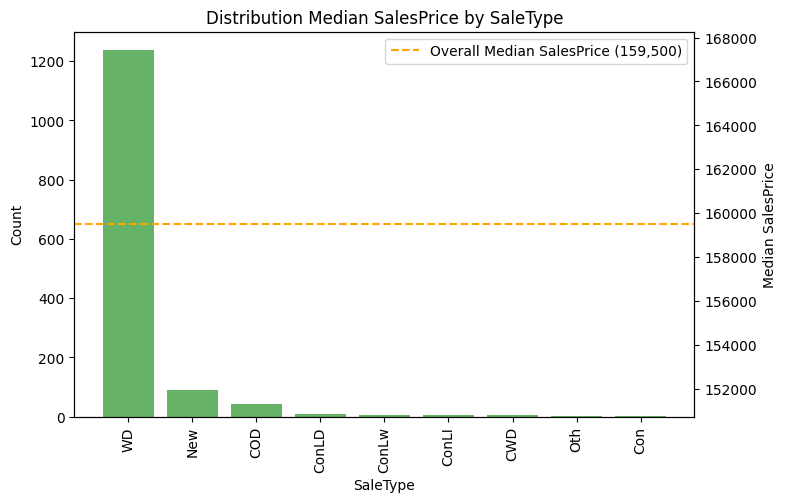

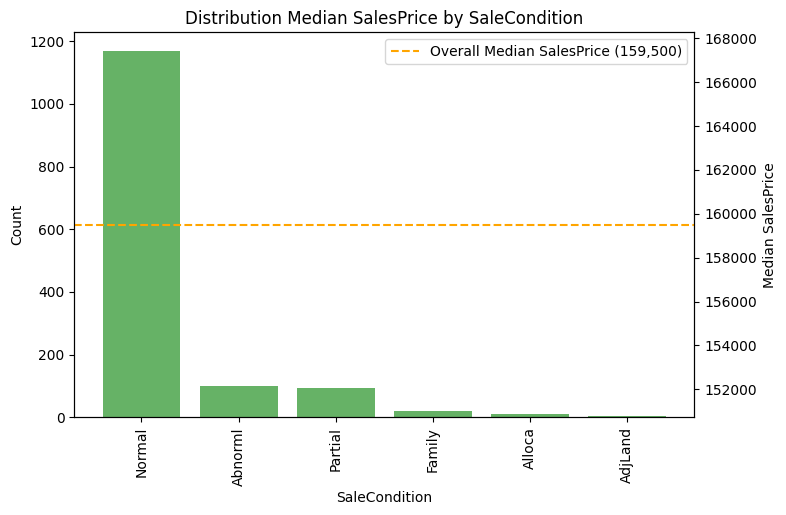

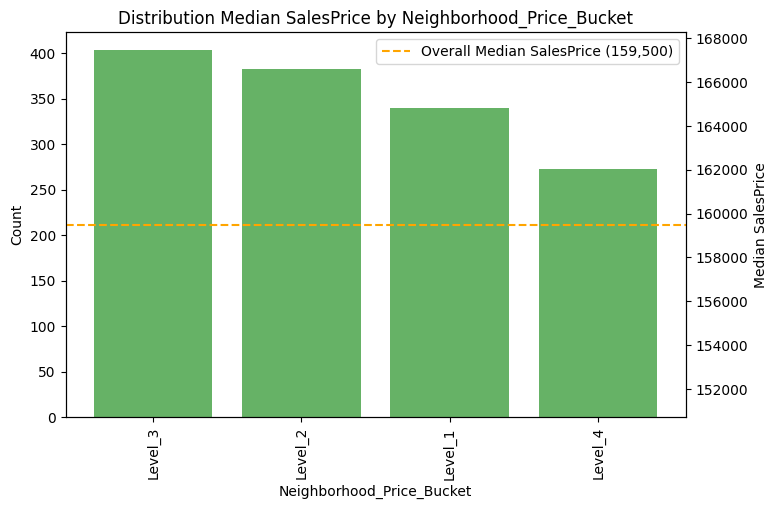

In [16]:
# Compute overall median of SalesPrice
overall_median = df['SalePrice'].median()

# Creating plots for each categorical variable
for col in categorical_data.columns:
    if col != 'SalePrice':  # Skip if the column is 'SalePrice'
        category_counts = categorical_data[col].value_counts()

        fig, ax1 = plt.subplots(figsize=(8, 5))

        # Bar plot for category counts
        ax1.bar(category_counts.index, category_counts.values, alpha=0.6, color='green', label='Count')
        ax1.set_ylabel('Count', color='black')
        ax1.set_xlabel(col)

        # Rotate x-axis labels to 90 degrees
        plt.xticks(rotation=90)

        # Creating a second y-axis for the overall median SalesPrice
        ax2 = ax1.twinx()
        ax2.axhline(y=overall_median, color='orange', linestyle='--', label=f'Overall Median SalesPrice ({overall_median:,.0f})')
        ax2.set_ylabel('Median SalesPrice', color='black')

        plt.title(f'Distribution Median SalesPrice by {col}')

        # Add legend for the second axis
        ax2.legend(loc='upper right')

        plt.show()


### Median Value per category

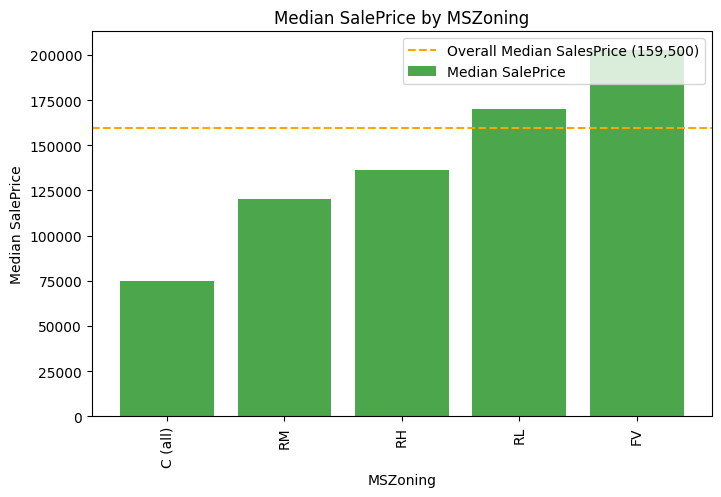

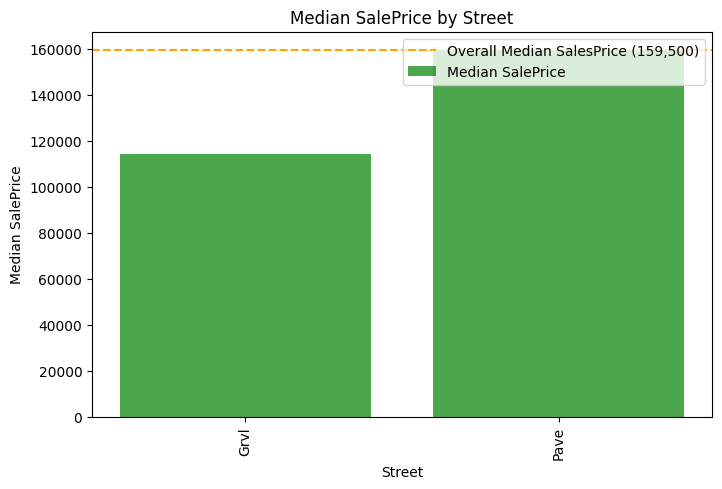

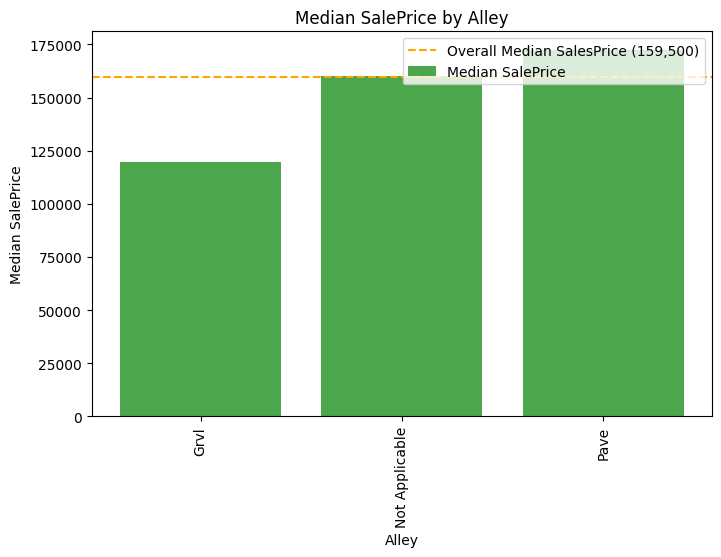

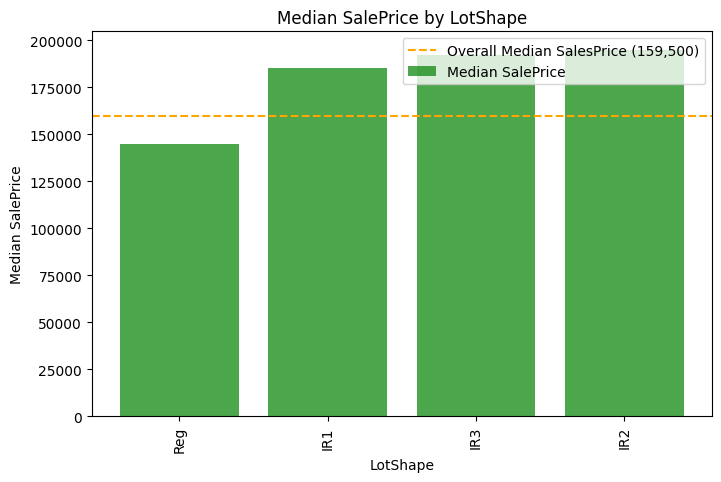

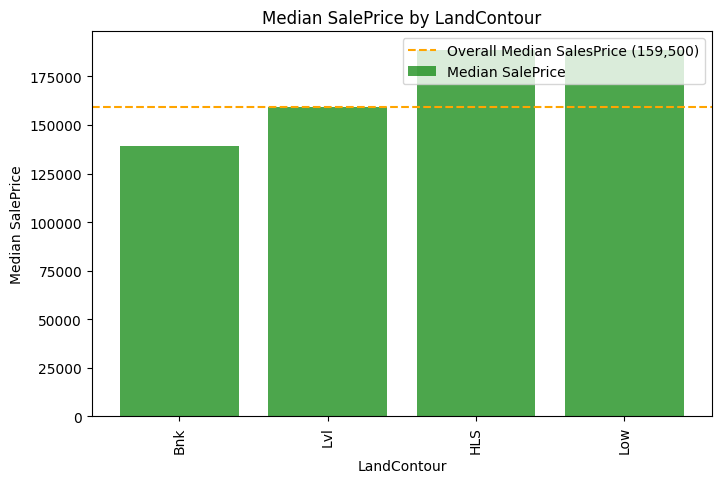

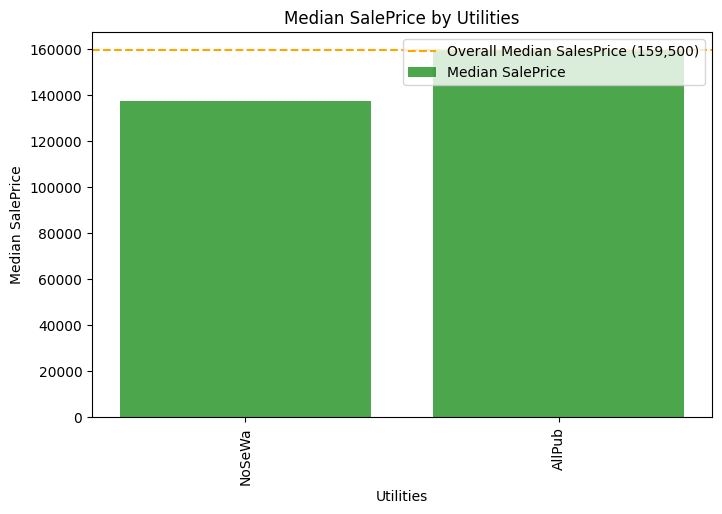

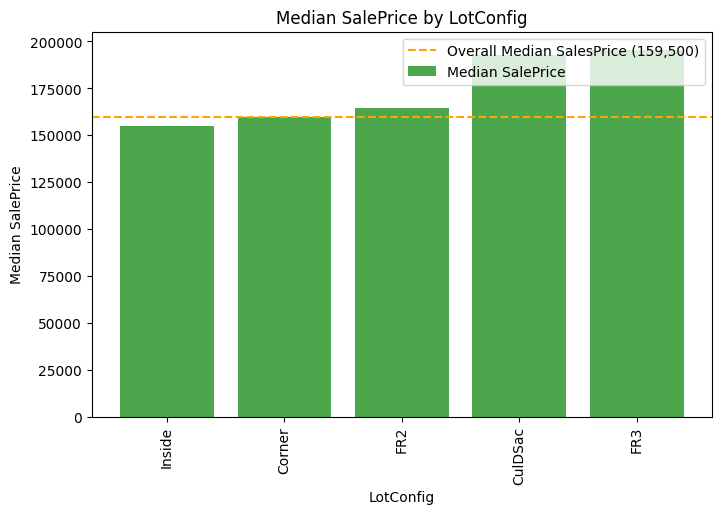

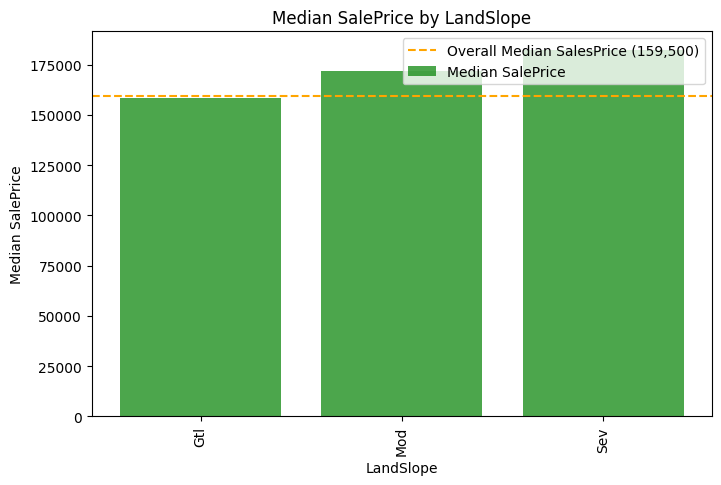

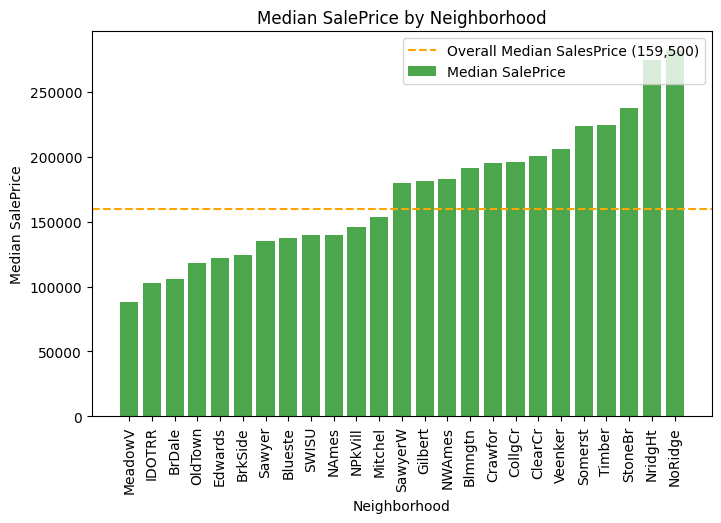

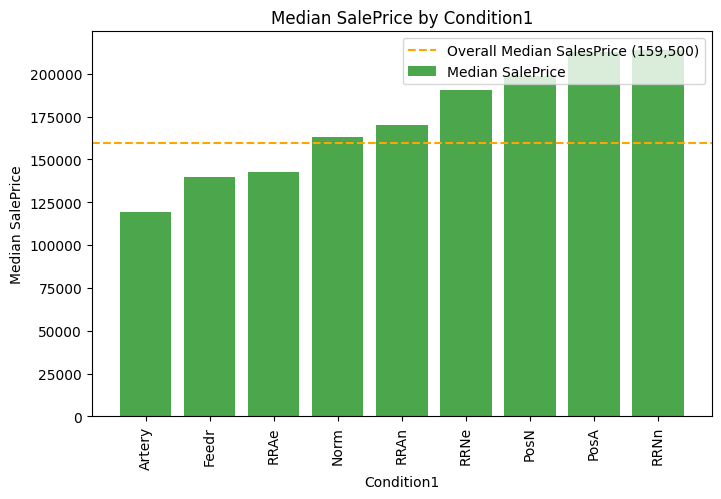

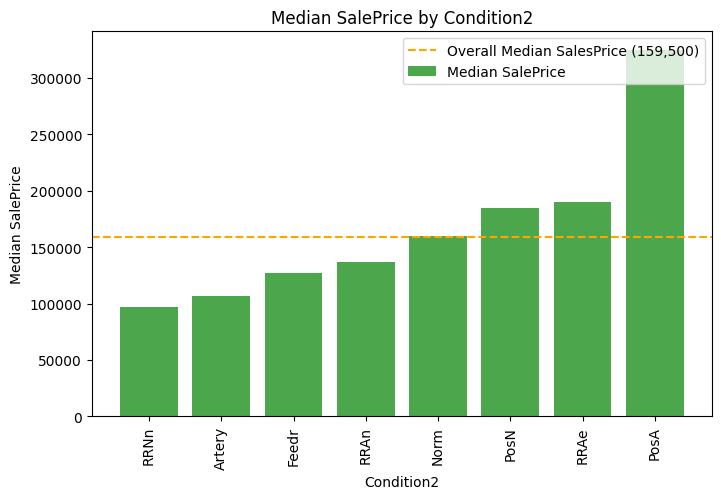

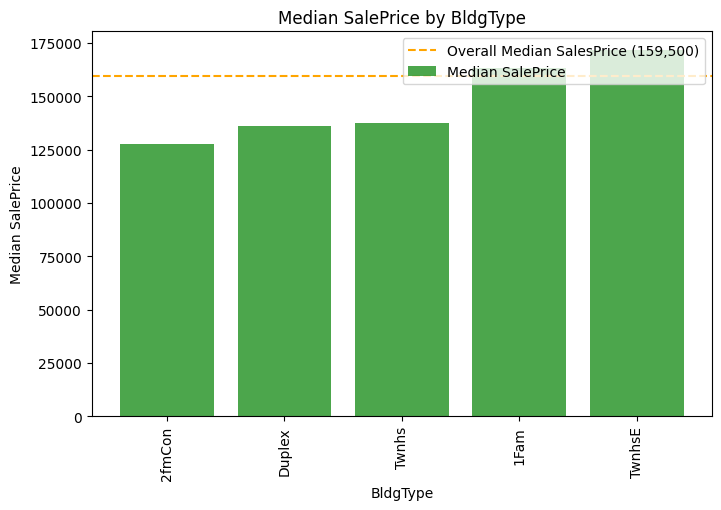

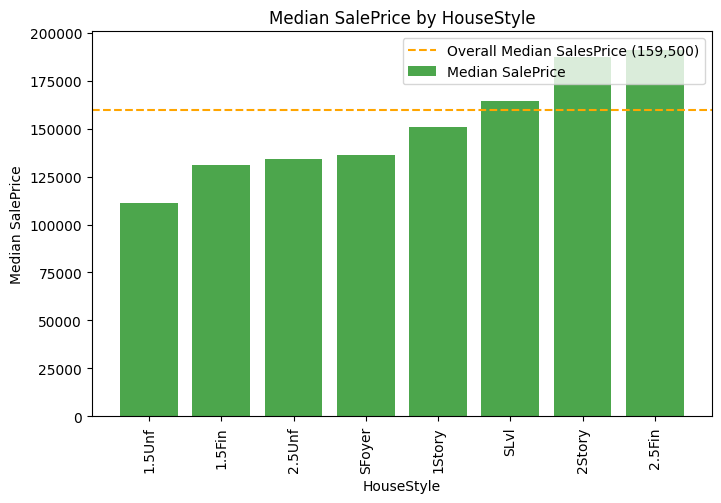

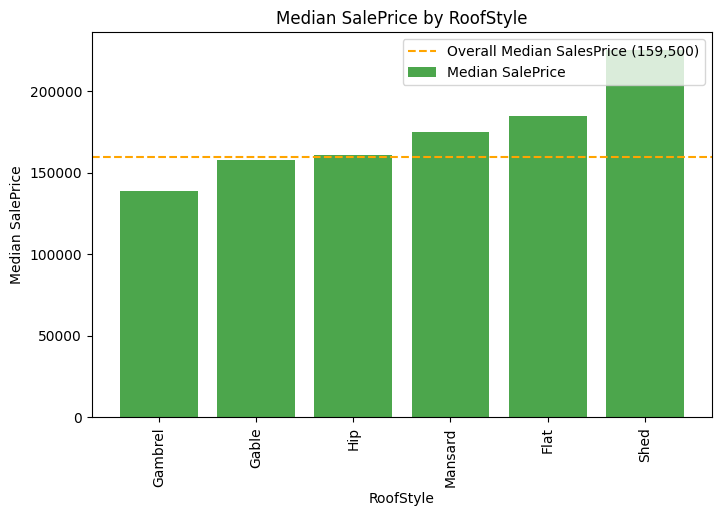

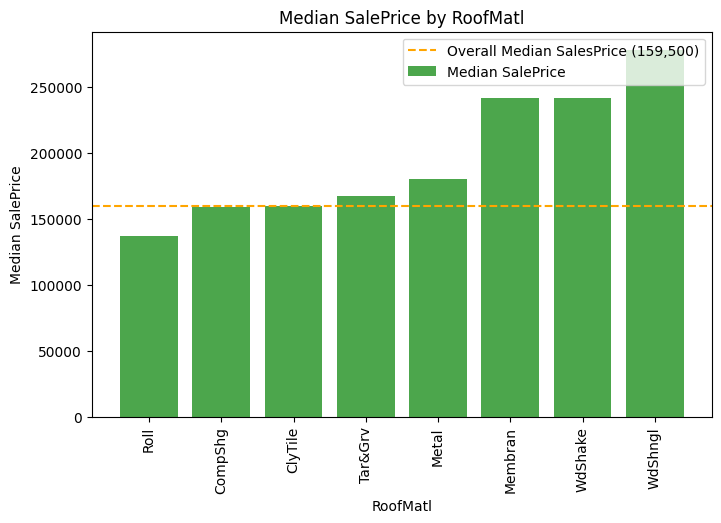

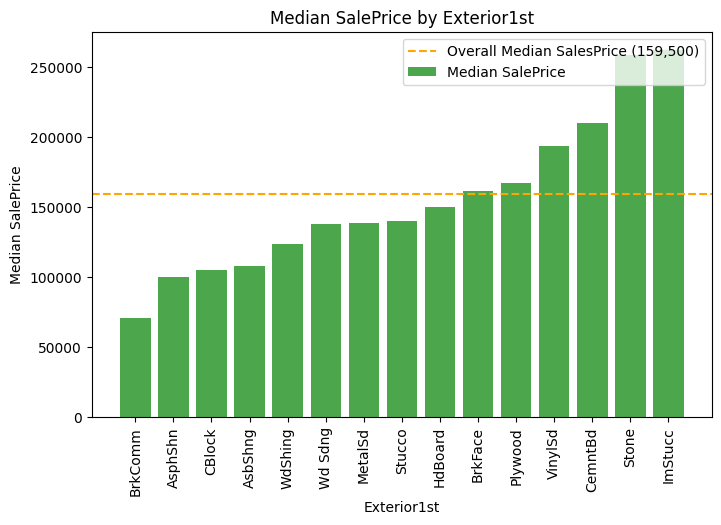

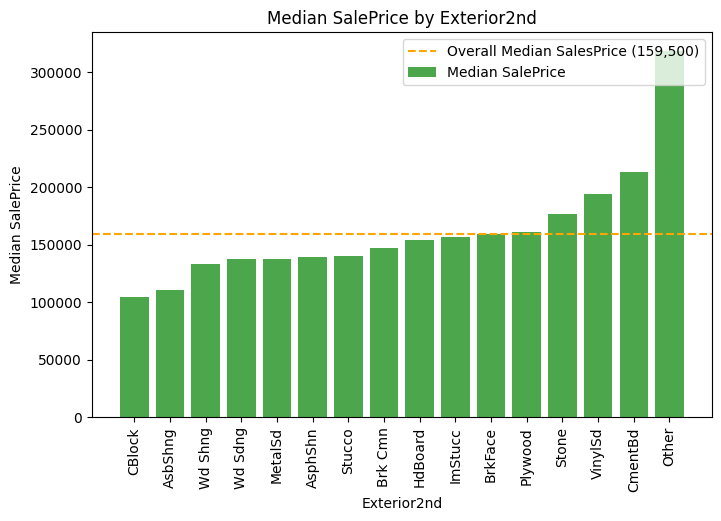

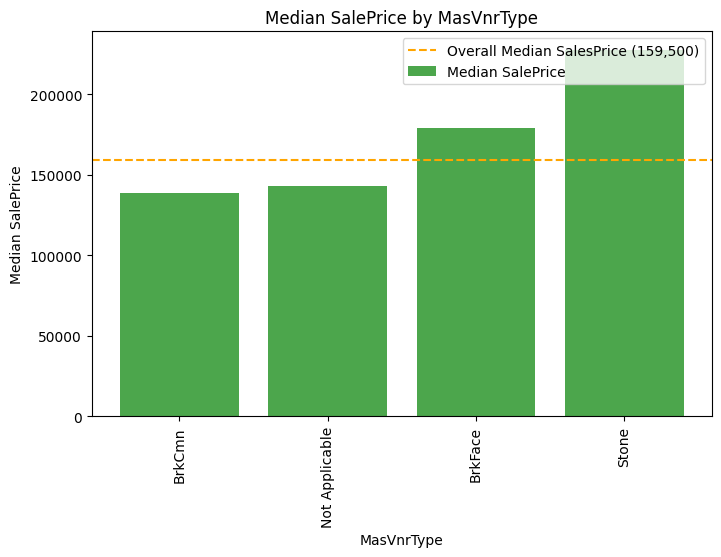

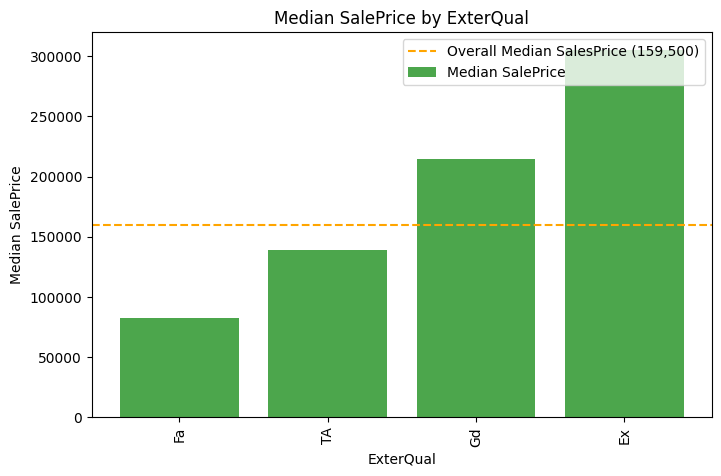

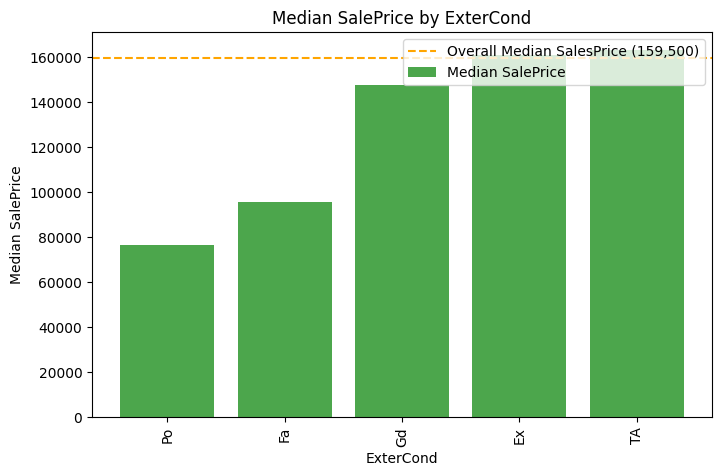

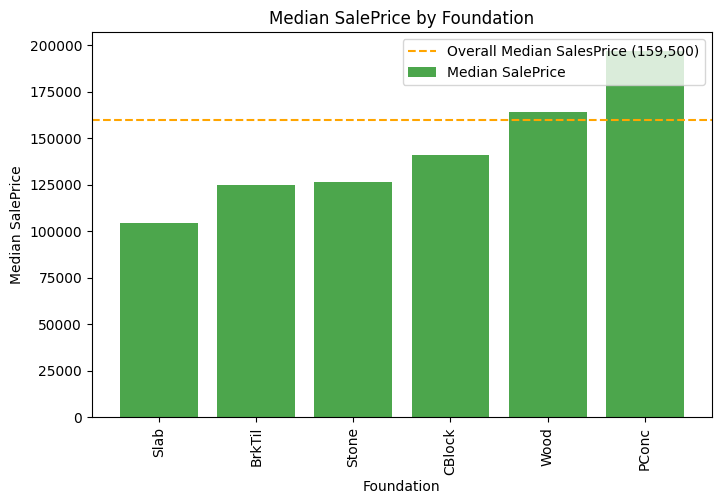

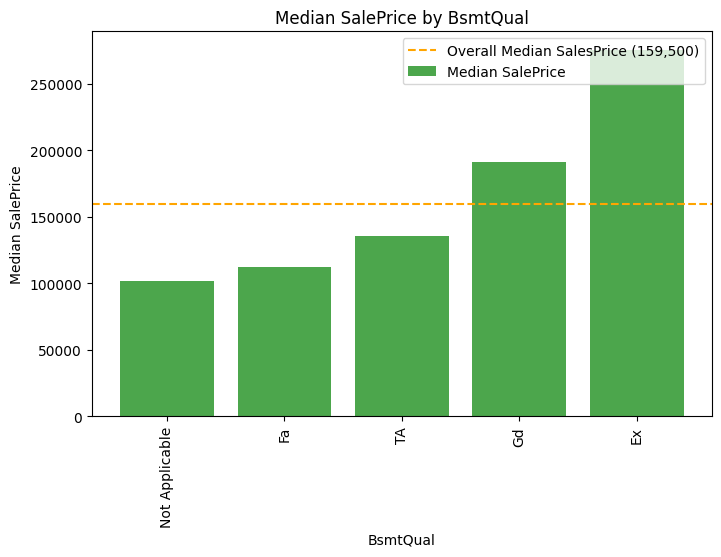

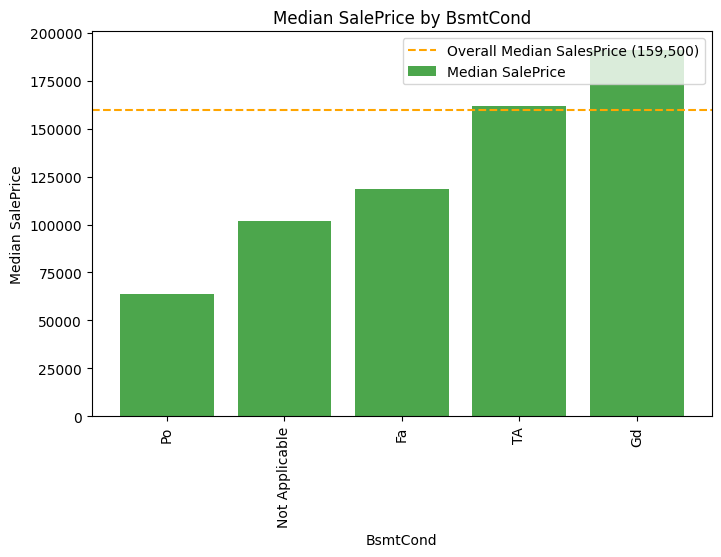

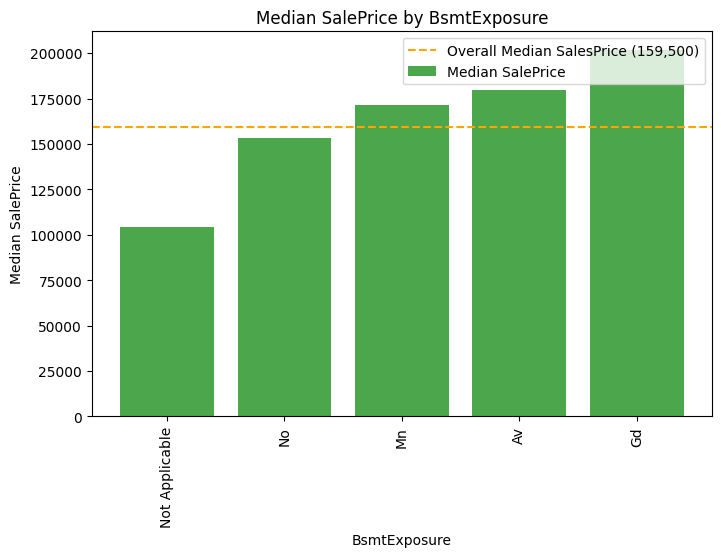

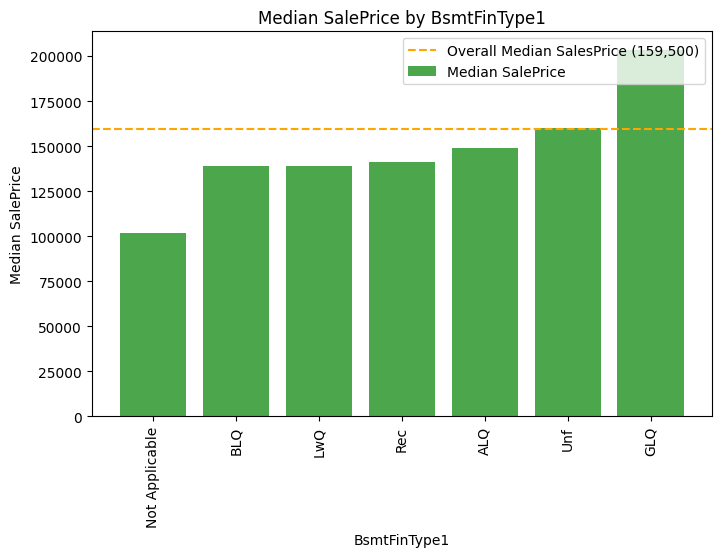

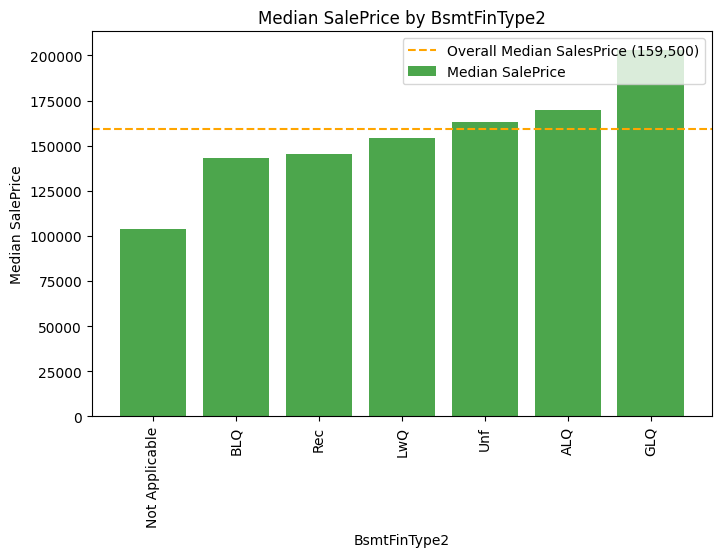

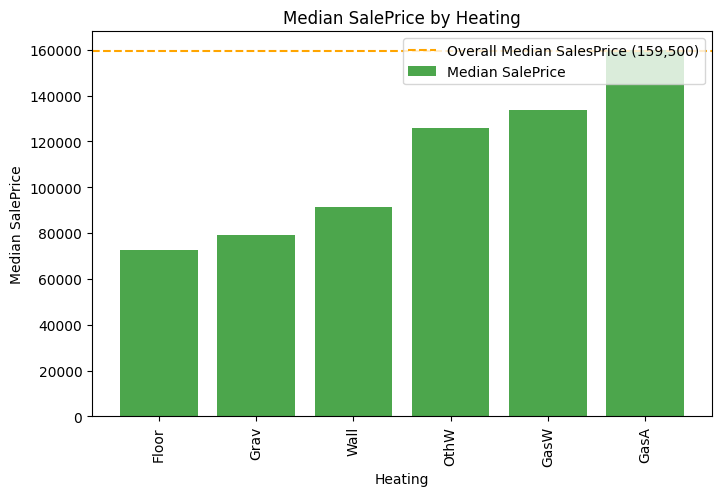

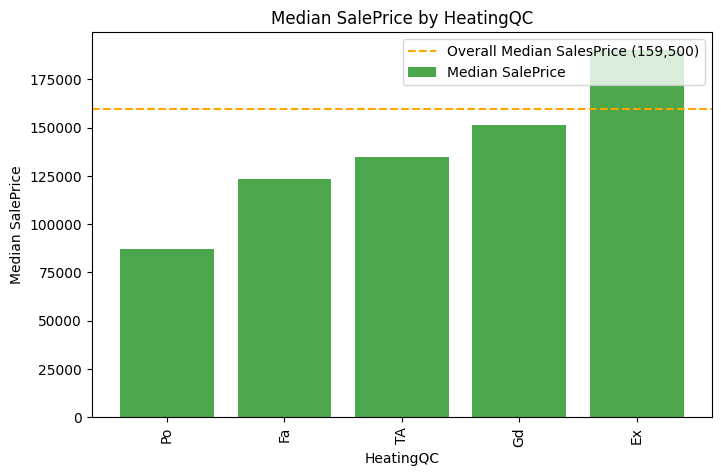

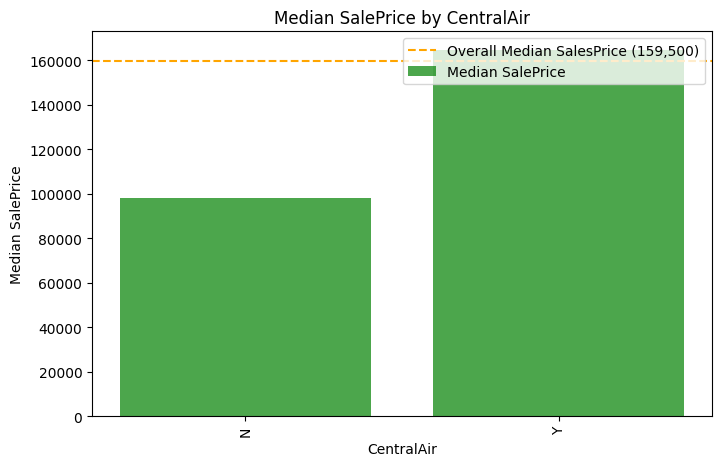

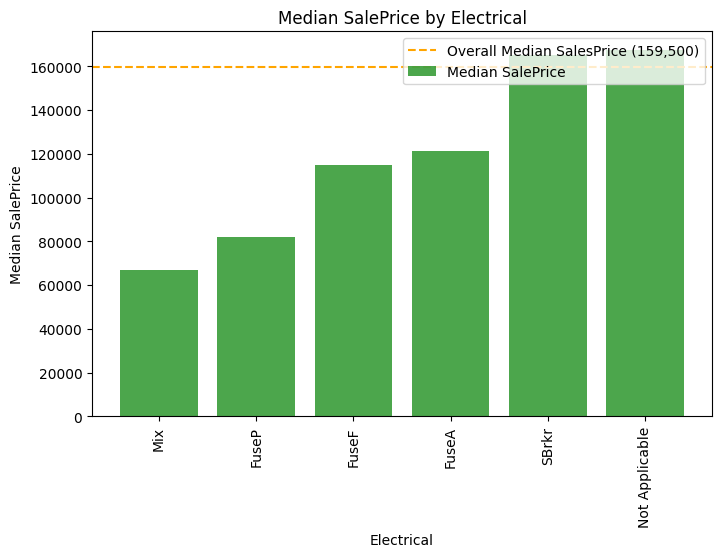

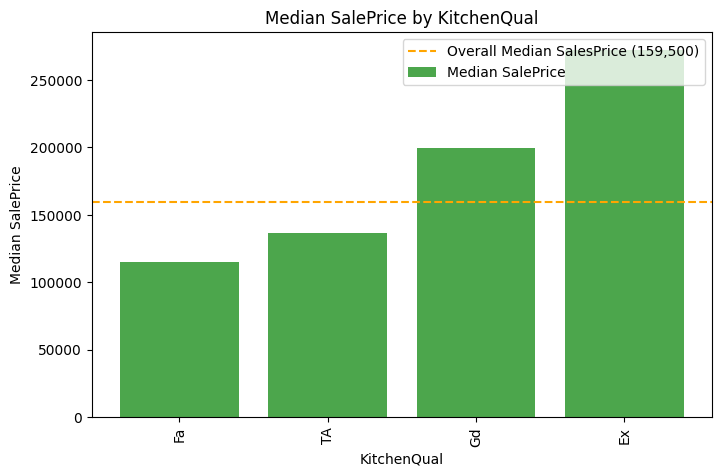

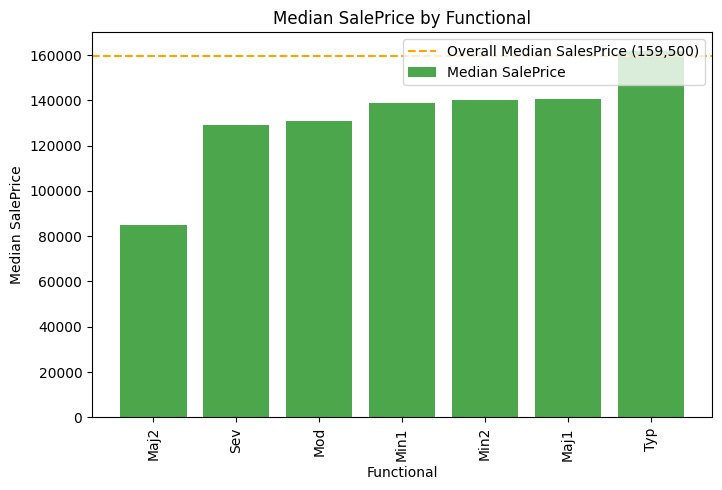

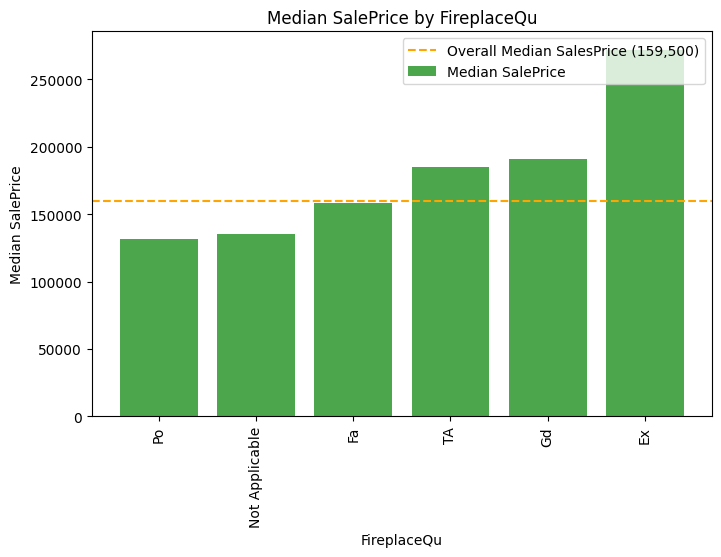

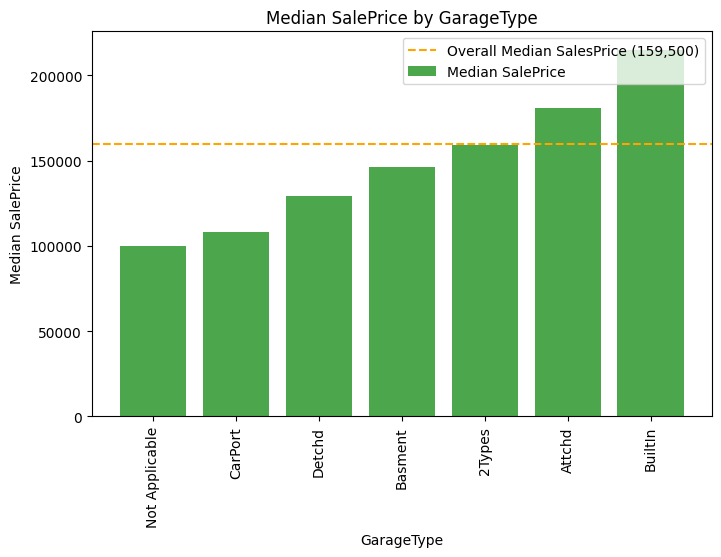

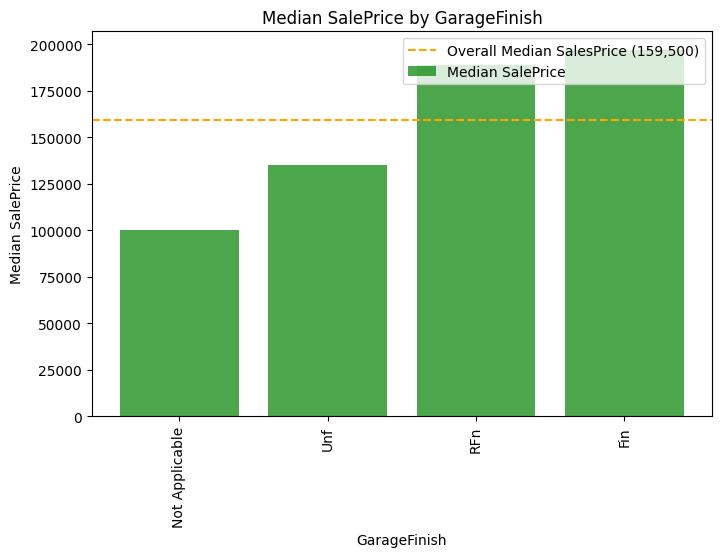

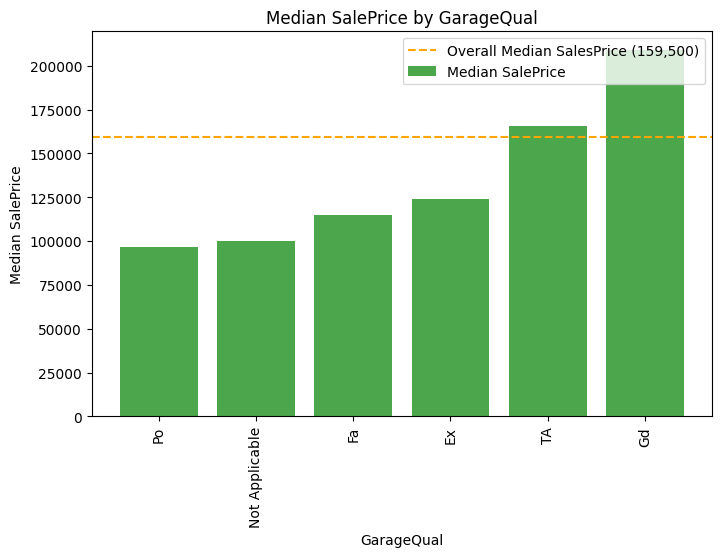

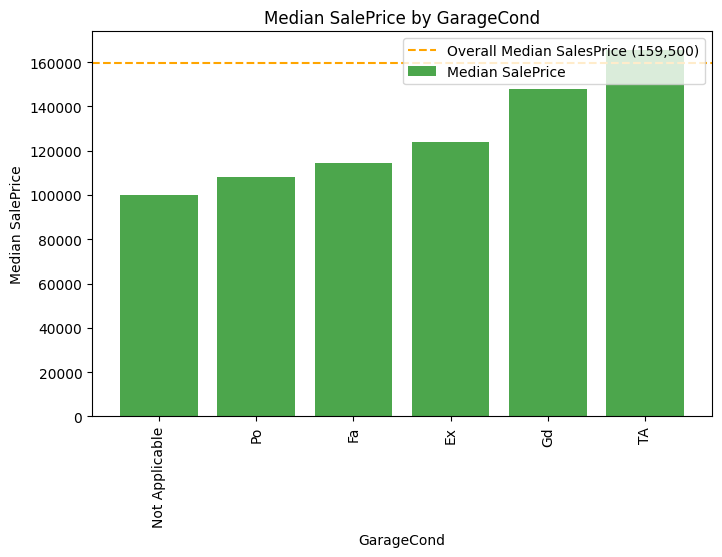

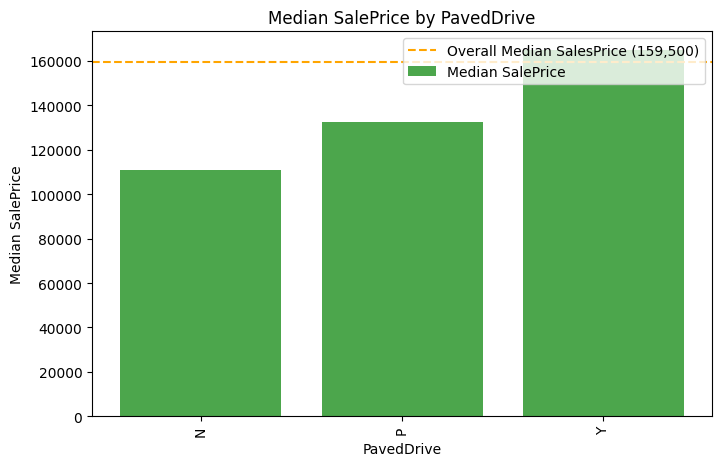

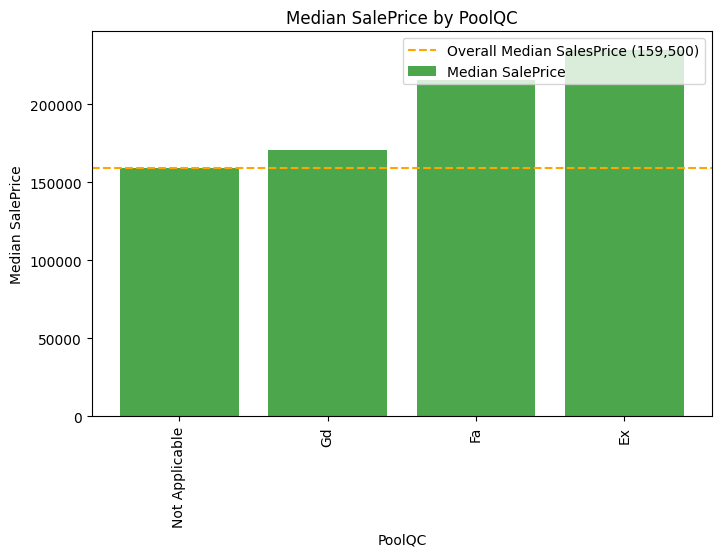

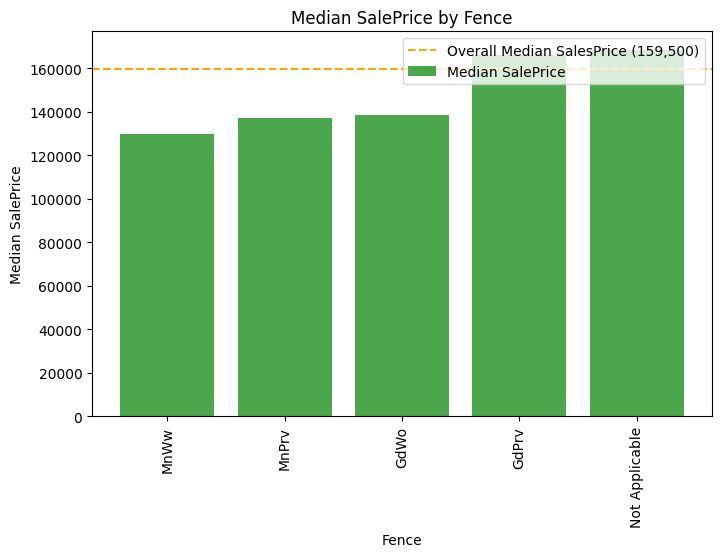

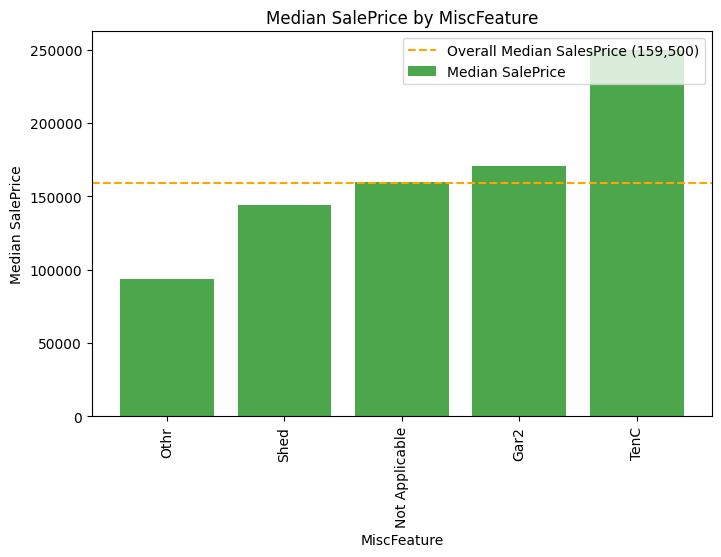

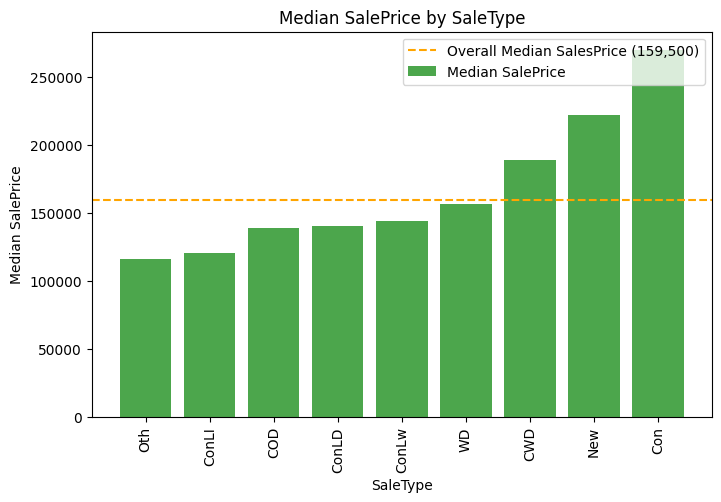

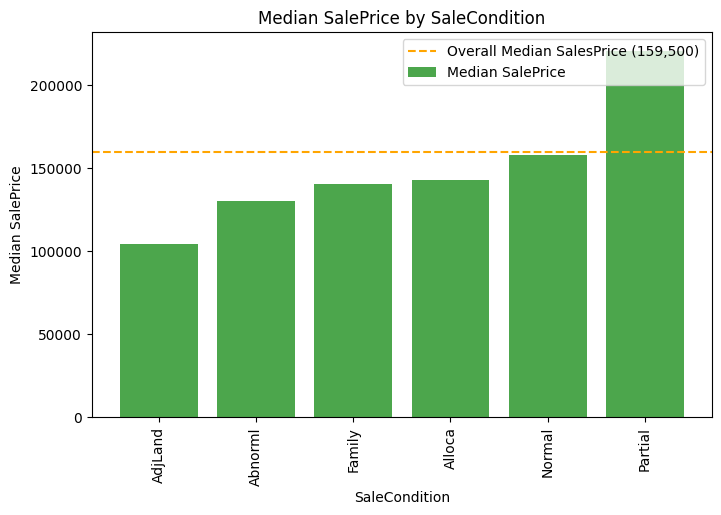

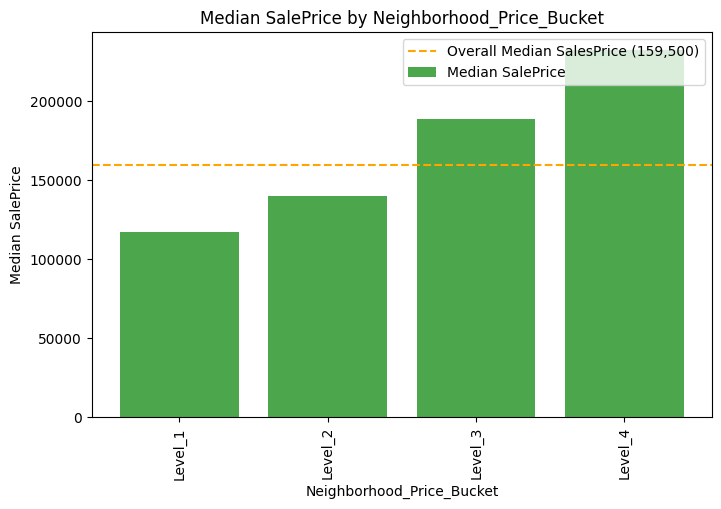

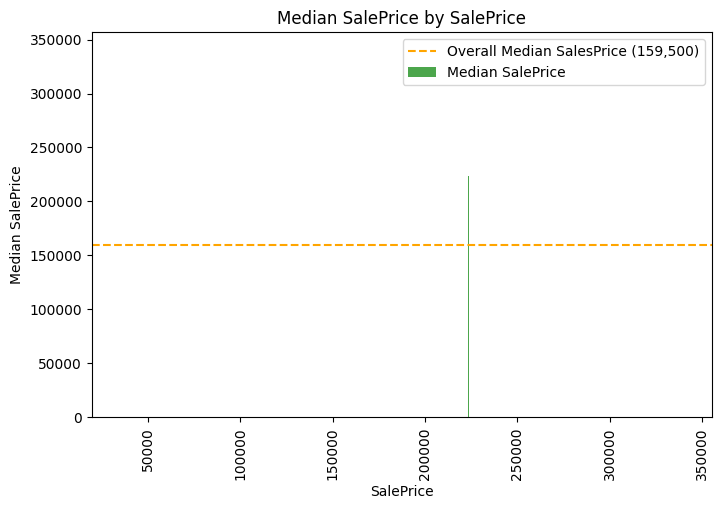

In [17]:
# Compute overall median of SalesPrice
overall_median = df['SalePrice'].median()

# Creating plots for each categorical variable
for col in categorical_data.columns:
    # Calculate median SalePrice for each category
    category_medians = df.groupby(col)['SalePrice'].median().sort_values()

    fig, ax = plt.subplots(figsize=(8, 5))

    # Bar plot for median SalePrice per category
    ax.bar(category_medians.index, category_medians.values, color='green', alpha=0.7, label='Median SalePrice')
    ax.set_ylabel('Median SalePrice', color='black')
    ax.set_xlabel(col)
    
    # Rotate x-axis labels to 90 degrees for readability
    plt.xticks(rotation=90)

    # Add an overall median line
    ax.axhline(y=overall_median, color='orange', linestyle='--', label=f'Overall Median SalesPrice ({overall_median:,.0f})')

    # Add title and legend
    plt.title(f'Median SalePrice by {col}')
    ax.legend(loc='upper right')

    plt.show()
